#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

#**CVAny Mart**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/CVanyMart.csv")
print("Dataframe Loaded:")

Dataframe Loaded:


In [ ]:
df

nama_toko  harga_per_unit unit  \
0       CVanyMart             2.9    l   
1       CVanyMart             1.2    l   
2       CVanyMart             1.1    l   
3       CVanyMart             1.1    l   
4       CVanyMart             1.1    l   
...           ...             ...  ...   
240660  CVanyMart            10.0   kg   
240661  CVanyMart             3.9   kg   
240662  CVanyMart             3.3   kg   
240663  CVanyMart             3.9   kg   
240664  CVanyMart             3.9   kg   

                                                     nama     tanggal  \
0                Scentcerity Calming Zen Room Spray 240ml  2021-01-01   
1       Almat So Soft Luxurious Fabric Conditioner- Li...  2021-01-02   
2       Almat So Soft Fabric Conditioner - Clear Skies...  2021-01-03   
3       Almat So Soft Fabric Conditioner - Pure & Gent...  2021-01-04   
4         Almat So Soft Sunshine Fabric Conditioner 1.26l  2021-01-05   
...                                                   ...         ...   
240660            Vitacat Pawsome Pockets With Salmon 65g  2022-02-25   
240661        Vitacat Select Tender Pâté With Salmon 100g  2022-02-26   
240662   Earls Select Tender Pâté With Beef & Turkey 150g  2022-02-27   
240663          Vitacat Select Tender Pâté With Beef 100g  2022-02-28   
240664          Vitacat Select With Chicken In Jelly 100g  2022-03-01   

         kategori  brand_sendiri  harga_pound  
0       household          False     0.690000  
1       household          False     1.040000  
2       household          False     1.156667  
3       household          False     1.215000  
4       household          False     1.250000  
...           ...            ...          ...  
240660       pets          False     0.754000  
240661       pets          False     0.614000  
240662       pets          False     0.582000  
240663       pets          False     0.522000  
240664       pets          False     0.462000  

[240665 rows x 8 columns]

## MISSING VALUE dan DUPPLICATE

In [ ]:
# Mengecek missing value
print("Cek Missing Value :")
missing_values = df.isnull().sum()
print(missing_values)

Cek Missing Value :
nama_toko         0
harga_per_unit    4
unit              4
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64


In [ ]:
# mengisi nilai harga_per_unit missing value dengan median
if missing_values['harga_per_unit'] > 0:
    median_price = df['harga_per_unit'].median()
    df['harga_per_unit'].fillna(median_price, inplace=True)
    print(f"Missing values pada 'harga_per_unit' diisi dengan nilai median : {median_price}")

# Mengisi nilai unit missing value dengan 'unit'
if missing_values['unit'] > 0:
    df.fillna('unit', inplace=True)
    print(f"Missing values pada 'unit' diisi dengan : 'unit'")


Missing values pada 'harga_per_unit' diisi dengan nilai median : 5.2
Missing values pada 'unit' diisi dengan : 'unit'


In [ ]:
# Mengecek ulang missing value setelah pengisian
print("Missing Value Setelah Pengisisian:")
print(df.isnull().sum())

Missing Value Setelah Pengisisian:
nama_toko         0
harga_per_unit    0
unit              0
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64


In [ ]:
# Mengecek duplikasi
print("Cek Duplikat :")
duplicates = df.duplicated().sum()
print(f"Jumlah Baris Duplikat: {duplicates}")

# Menghapus duplikasi (jika ada)
df = df.drop_duplicates()

Cek Duplikat :
Jumlah Baris Duplikat: 0


In [ ]:
#Save csv
df.to_csv('CVAny_Cleant.csv', index = False)

## Analisis Data

In [ ]:
df

nama_toko  harga_per_unit unit  \
0       CVanyMart             2.9    l   
1       CVanyMart             1.2    l   
2       CVanyMart             1.1    l   
3       CVanyMart             1.1    l   
4       CVanyMart             1.1    l   
...           ...             ...  ...   
240660  CVanyMart            10.0   kg   
240661  CVanyMart             3.9   kg   
240662  CVanyMart             3.3   kg   
240663  CVanyMart             3.9   kg   
240664  CVanyMart             3.9   kg   

                                                     nama     tanggal  \
0                Scentcerity Calming Zen Room Spray 240ml  2021-01-01   
1       Almat So Soft Luxurious Fabric Conditioner- Li...  2021-01-02   
2       Almat So Soft Fabric Conditioner - Clear Skies...  2021-01-03   
3       Almat So Soft Fabric Conditioner - Pure & Gent...  2021-01-04   
4         Almat So Soft Sunshine Fabric Conditioner 1.26l  2021-01-05   
...                                                   ...         ...   
240660            Vitacat Pawsome Pockets With Salmon 65g  2022-02-25   
240661        Vitacat Select Tender Pâté With Salmon 100g  2022-02-26   
240662   Earls Select Tender Pâté With Beef & Turkey 150g  2022-02-27   
240663          Vitacat Select Tender Pâté With Beef 100g  2022-02-28   
240664          Vitacat Select With Chicken In Jelly 100g  2022-03-01   

         kategori  brand_sendiri  harga_pound  
0       household          False     0.690000  
1       household          False     1.040000  
2       household          False     1.156667  
3       household          False     1.215000  
4       household          False     1.250000  
...           ...            ...          ...  
240660       pets          False     0.754000  
240661       pets          False     0.614000  
240662       pets          False     0.582000  
240663       pets          False     0.522000  
240664       pets          False     0.462000  

[240665 rows x 8 columns]

In [ ]:
# Mengambil data dengan kategori 'health_products'
health_products_df = df[df['kategori'] == 'health_products']

In [ ]:
# Menampilkan beberapa baris pertama dari data 'food_cupboard'
print("'health_products' Data:")
health_products_df

'health_products' Data:


nama_toko  harga_per_unit  unit  \
2676    CVanyMart            4.20     l   
2677    CVanyMart            2.99  unit   
2678    CVanyMart            5.00     l   
2679    CVanyMart            5.00     l   
2680    CVanyMart            0.02  unit   
...           ...             ...   ...   
240636  CVanyMart           69.90     l   
240637  CVanyMart            1.15  unit   
240638  CVanyMart            2.00     l   
240639  CVanyMart            9.20     l   
240640  CVanyMart            0.11  unit   

                                                     nama    tanggal  \
2676                   Lacura Hairspray Strong Hold 400ml 2022-01-02   
2677                      Lacura Healthy Glow Toner 250ml 2022-01-03   
2678                        Lacura Shampoo - Mighty 300ml 2022-01-04   
2679                    Lacura Conditioner - Mighty 300ml 2022-01-05   
2680          Health Essentials Paracetamol 16 Pack/500mg 2022-01-06   
...                                                   ...        ...   
240636  Hotel Collection No. 3 Pomegranate Eau De Parf... 2022-02-01   
240637    Colgate Big Kids' Smiles 6+ Years Toothpaste 50 2022-02-02   
240638                 Dentitex Cool Mint Mouthwash 500ml 2022-02-03   
240639  Lacura Nourishing Hand Cream With Shea Butter ... 2022-02-04   
240640  Always Ultra Day Sanitary Towels Normal (Size ... 2022-02-05   

               kategori  brand_sendiri  harga_pound  
2676    health_products           True        1.130  
2677    health_products           True        1.530  
2678    health_products           True        1.630  
2679    health_products           True        1.730  
2680    health_products          False        1.610  
...                 ...            ...          ...  
240636  health_products          False        2.382  
240637  health_products          False        2.474  
240638  health_products          False        2.574  
240639  health_products           True        2.262  
240640  health_products          False        2.664  

[11083 rows x 8 columns]

In [ ]:
# Analisis Deskriktif Statstik
print("Deskriktif Statstik:")
print(health_products_df.describe())

Deskriktif Statstik:
       harga_per_unit                        tanggal   harga_pound
count    11083.000000                          11083  11083.000000
mean         7.543061  2022-07-30 09:09:43.704773120      1.954741
min          0.010000            2021-01-01 00:00:00      0.470000
25%          0.400000            2021-10-19 00:00:00      1.362000
50%          2.400000            2022-07-21 00:00:00      1.770000
75%          5.600000            2023-05-23 00:00:00      2.302000
max        149.800000            2024-02-29 00:00:00     11.130000
std         18.271747                            NaN      0.918534



Top 10 Selling Products by Frequency:
nama
Activ-max One-a-day Raspberry Flavoured Vitamin C Effer    49
Aussie Mega Hair Conditioner For Everyday Conditioning     49
Tampax Super Plus Tampons With Cardboard Applicator 20     49
Lacura Coconut & Shea Butter Shower Gel 250ml              49
Lacura Moisture Shower Crème With Shea Butter Extract 3    49
Lacura Revive Shower Gel With Sea Minerals Extract 300m    49
Always Daily Protect Long Panty Liners, Odour Lock, 46     49
Always Daily Protect Extra Long Panty Liners, Odour Loc    49
Lacura Anti-dandruff Moisture Shampoo 500ml                49
Hotel Collection No39 Poppy & Barley Eau De Parfum 100m    49
Name: count, dtype: int64


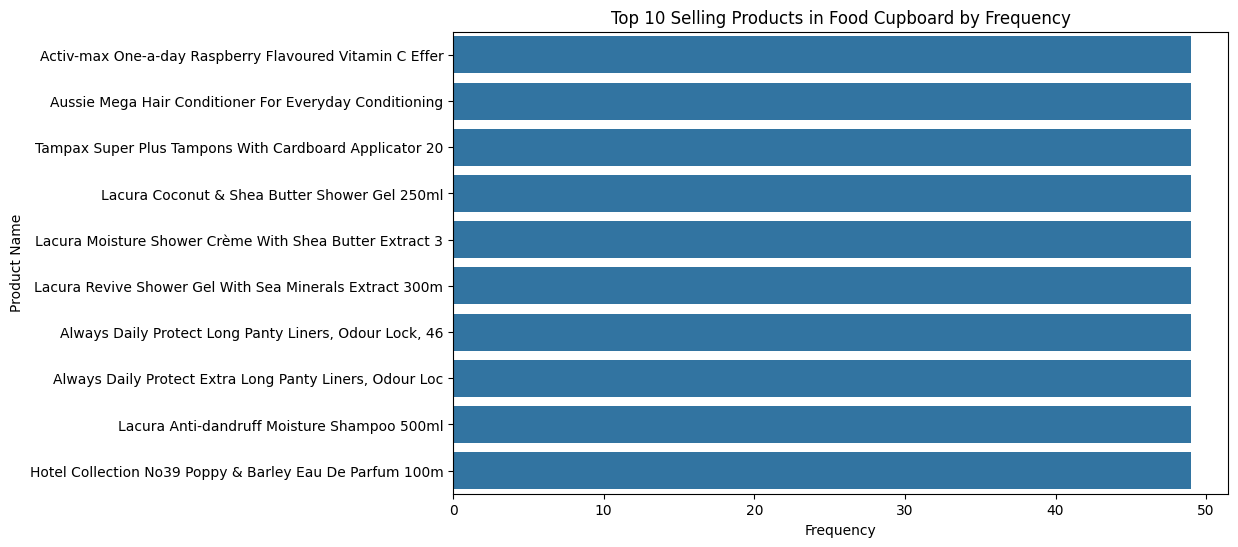

In [ ]:
# Penjualan Teratas
top_selling_products =health_products_df['nama'].value_counts().head(10)
print("\nTop 10 Selling Products by Frequency:")
print(top_selling_products)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index)
plt.title('Top 10 Selling Products in Food Cupboard by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.show()

<ipython-input-30-a6727e563e98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_products_df['tanggal'] = pd.to_datetime(health_products_df['tanggal'])


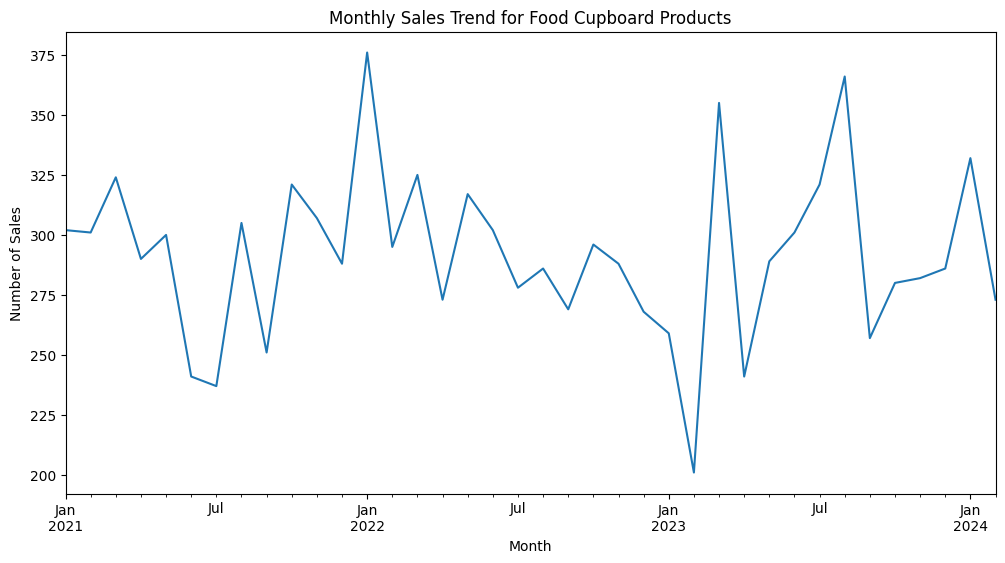

In [ ]:
# Tren Waktu
health_products_df['tanggal'] = pd.to_datetime(health_products_df['tanggal'])
monthly_sales = health_products_df.groupby(health_products_df['tanggal'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend for Food Cupboard Products')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


Brand vs Non-Brand Distribution:
brand_sendiri
False    5584
True     5499
Name: count, dtype: int64


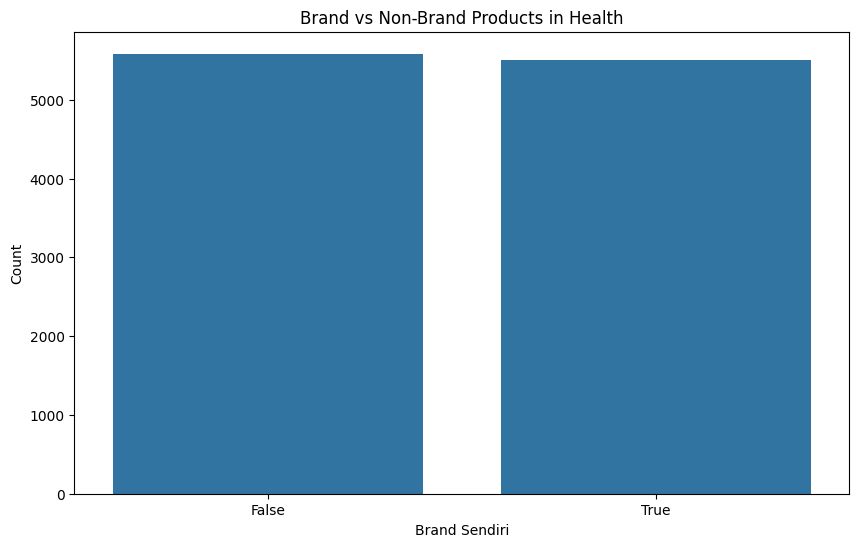

In [ ]:
# Analisis Brand Sendiri
brand_vs_non_brand = health_products_df['brand_sendiri'].value_counts()
print("\nBrand vs Non-Brand Distribution:")
print(brand_vs_non_brand)

plt.figure(figsize=(10, 6))
sns.countplot(x='brand_sendiri', data=health_products_df)
plt.title('Brand vs Non-Brand Products in Health')
plt.xlabel('Brand Sendiri')
plt.ylabel('Count')
plt.show()

## Menyiapkan Data

In [ ]:
final_data.columns

Index(['tanggal', 'harga_pound'], dtype='object')

In [ ]:
selected_data = health_products_df[["tanggal", "harga_pound"]]
selected_data = selected_data.sort_values(by="tanggal")

selected_data['month'] = selected_data['tanggal'].dt.to_period('M')

average_per_month = selected_data.groupby('month')['harga_pound'].mean().reset_index()

average_per_month['tanggal'] = average_per_month['month'].dt.to_timestamp('M')

final_data = average_per_month[['tanggal', 'harga_pound']]

final_data

tanggal  harga_pound
0  2021-01-31     1.872682
1  2021-02-28     1.871827
2  2021-03-31     1.823309
3  2021-04-30     1.983117
4  2021-05-31     1.882193
5  2021-06-30     2.085344
6  2021-07-31     2.105899
7  2021-08-31     1.822649
8  2021-09-30     2.048048
9  2021-10-31     1.843327
10 2021-11-30     1.917049
11 2021-12-31     1.785556
12 2022-01-31     1.909766
13 2022-02-28     1.826617
14 2022-03-31     1.977895
15 2022-04-30     1.963670
16 2022-05-31     1.881054
17 2022-06-30     2.094656
18 2022-07-31     2.110561
19 2022-08-31     1.994650
20 2022-09-30     1.826201
21 2022-10-31     1.930527
22 2022-11-30     1.856786
23 2022-12-31     1.990567
24 2023-01-31     2.052039
25 2023-02-28     2.055512
26 2023-03-31     1.926096
27 2023-04-30     2.044863
28 2023-05-31     1.866830
29 2023-06-30     1.922272
30 2023-07-31     2.002660
31 2023-08-31     1.957754
32 2023-09-30     2.025074
33 2023-10-31     2.060121
34 2023-11-30     1.904509
35 2023-12-31     1.906860
36 2024-01-31     2.177440
37 2024-02-29     2.141524

## Dekomposisi Data

In [ ]:
final_data.describe()

harga_pound
count    38.000000
mean      1.959145
std       0.102358
min       1.785556
25%       1.874775
50%       1.944141
75%       2.047252
max       2.177440

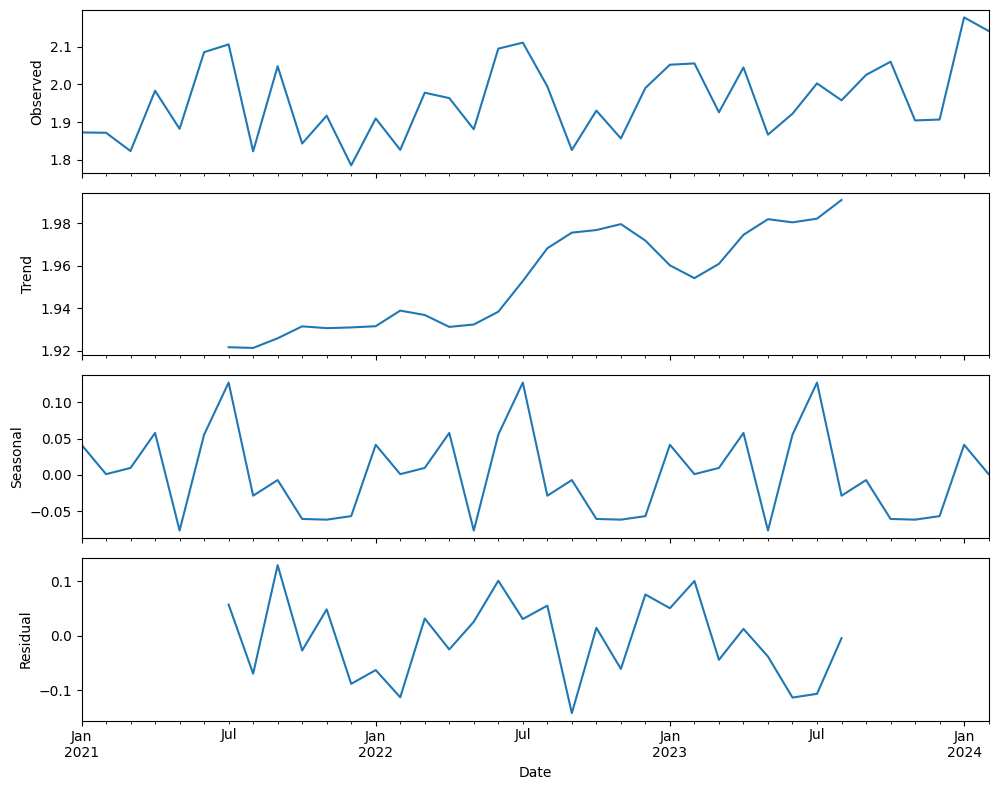

In [ ]:
final_data.set_index('tanggal', inplace=True)

decomposition = sm.tsa.seasonal_decompose(final_data['harga_pound'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

<ipython-input-58-3d73266c3ee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['harga_pound'] = final_data['harga_pound'].astype(float)


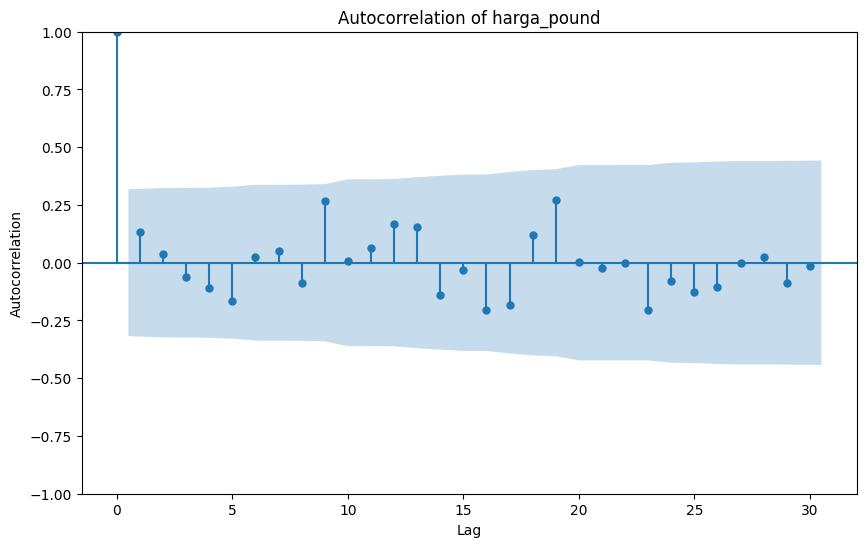

In [ ]:
final_data['harga_pound'] = final_data['harga_pound'].astype(float)

# Plot the autocorrelation
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(final_data['harga_pound'], lags=30, ax=ax)
ax.set_title('Autocorrelation of harga_pound')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.show()


## Split Data

In [ ]:
split_index = int(len(final_data) * 0.9)


train = final_data[:split_index]
test = final_data[split_index:]

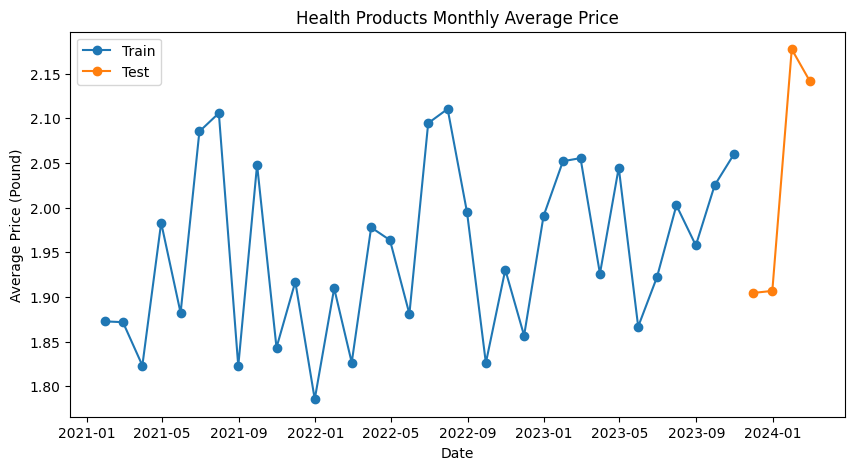

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, 'o-', label='Train')
plt.plot(test.index, test, 'o-', label='Test')
plt.xlabel('Date')
plt.ylabel('Average Price (Pound)')
plt.title('Health Products Monthly Average Price')
plt.legend()
plt.show()

Cek Stasioneritas

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Melakukan uji ADF pada data pelatihan
result = adfuller(train['harga_pound'])

# Menampilkan hasil uji ADF
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\nKesimpulan:')
if value <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -5.080845
p-value: 0.000015
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616

Kesimpulan:
(Tolak H0) ---> Stasioner


## Modeling SARIMA

In [ ]:
# HyperParameter

import itertools

# Tentukan rentang nilai untuk parameter p, d, q, P, D, Q
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = [12]  # Data musiman bulanan

# Buat daftar semua kombinasi parameter
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

best_aic = np.inf
best_params = None
best_model = None

# Coba setiap kombinasi parameter dan pilih yang memberikan AIC terendah
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(train['harga_pound'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            temp_result = temp_model.fit(disp=False)

            if temp_result.aic < best_aic:
                best_aic = temp_result.aic
                best_params = (param, param_seasonal)
                best_model = temp_model
        except:
            continue


In [ ]:

print(f'Best SARIMAX parameters: {best_params}')
print(f'Best AIC: {best_aic}')

Best SARIMAX parameters: None
Best AIC: inf


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Parameter
p, d, q = 1, 2, 2
P, D, Q, s = 1,1,1, 12

# MemasangSARIMA
model = SARIMAX(train['harga_pound'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                          harga_pound   No. Observations:                   34
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 12)   Log Likelihood                  10.400
Date:                              Wed, 05 Jun 2024   AIC                             -8.799
Time:                                      04:49:00   BIC                             -2.825
Sample:                                  01-31-2021   HQIC                            -7.633
                                       - 10-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7685      0.414     -1.855      0.064      -1.581       0.043
ma.L1         -0.65

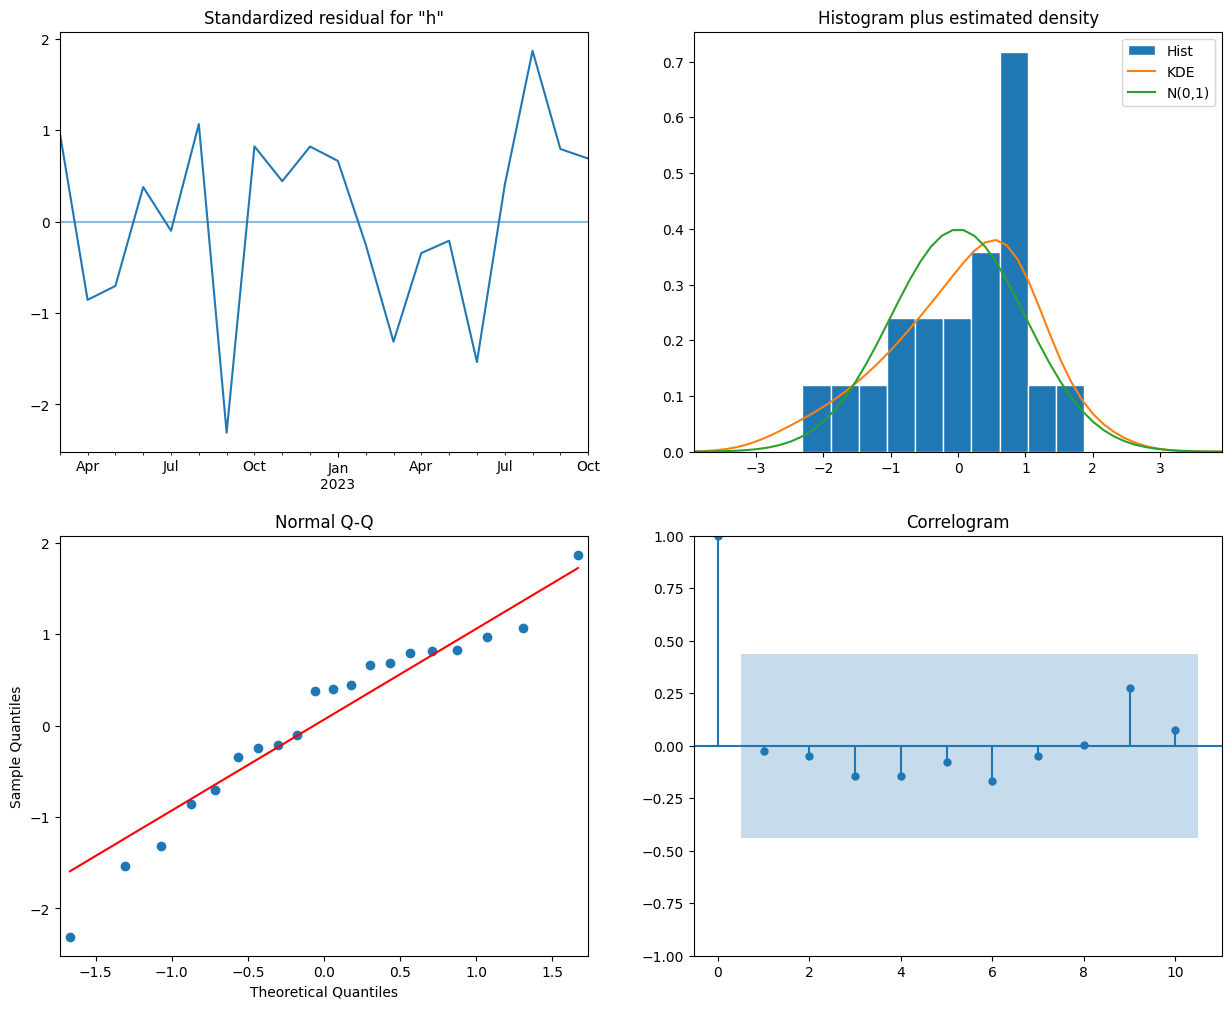

In [ ]:
# Model diagnostics
results.plot_diagnostics(figsize=(15, 12))

plt.show()

In [ ]:
#Forecast
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
predictions = results.get_prediction(start=pred_start_date, end=pred_end_date, dynamic=False)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

normalization_factor = test['harga_pound'].mean() / predicted_mean.mean()
normalized_predicted_mean = predicted_mean * normalization_factor


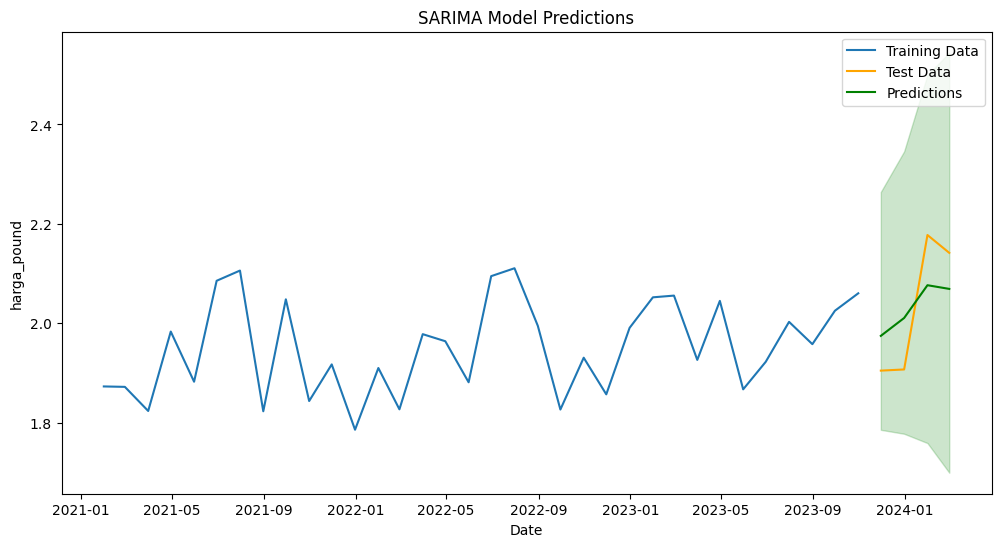

In [ ]:
# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['harga_pound'], label='Training Data')
plt.plot(test.index, test['harga_pound'], label='Test Data', color='orange')
plt.plot(predicted_mean.index, normalized_predicted_mean, color='green', label='Predictions')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='green', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('harga_pound')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the forecast error
mae = mean_absolute_error(test, normalized_predicted_mean)
mape = mean_absolute_percentage_error(test, normalized_predicted_mean)
rmse = np.sqrt(mean_squared_error(test, normalized_predicted_mean))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.08678066616740487
Test MAPE: 0.04283306994279933
Test RMSE: 0.08817024697981236


## Forecast Data

In [ ]:
forecast_data = normalized_predicted_mean.to_frame()

forecast_data = forecast_data.reset_index()
forecast_data.columns = ['tanggal', 'forecast']
forecast_data['tanggal'] = pd.to_datetime(forecast_data['tanggal'])
forecast_data

tanggal  forecast
0 2023-11-30  1.974462
1 2023-12-31  2.010469
2 2024-01-31  2.076410
3 2024-02-29  2.068992

In [ ]:
monthly_healthproduct = final_data.reset_index()
monthly_healthproduct['tanggal'] = pd.to_datetime(monthly_healthproduct['tanggal'])
forecast_cvany = pd.merge(monthly_healthproduct, forecast_data, on='tanggal', how='left')
forecast_cvany['nama_toko'] = 'CVAny'
print(forecast_cvany.head())

     tanggal  harga_pound  forecast nama_toko
0 2021-01-31     1.872682       NaN     CVAny
1 2021-02-28     1.871827       NaN     CVAny
2 2021-03-31     1.823309       NaN     CVAny
3 2021-04-30     1.983117       NaN     CVAny
4 2021-05-31     1.882193       NaN     CVAny


In [ ]:
forecast_cvany.iloc[-4:, forecast_cvany.columns.get_loc('harga_pound')] = np.nan
print(forecast_cvany.tail())

      tanggal  harga_pound  forecast nama_toko
33 2023-10-31     2.060121       NaN     CVAny
34 2023-11-30          NaN  1.974462     CVAny
35 2023-12-31          NaN  2.010469     CVAny
36 2024-01-31          NaN  2.076410     CVAny
37 2024-02-29          NaN  2.068992     CVAny


In [ ]:
#Save csv
forecast_cvany.to_csv('CVAny_forecast.csv', index = False)

#**UK Mart**

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

##Data Pre Processing

In [ ]:
#Memuat Dataset
UKMart = pd.read_csv('/content/drive/MyDrive/Dataset/UKMart.csv')

In [ ]:
UKMart

nama_toko  harga_pound  harga_per_unit unit  \
0          UKMart         1.50            3.00   kg   
1          UKMart         1.65            0.82    l   
2          UKMart         1.65            0.82    l   
3          UKMart         0.90            0.90   kg   
4          UKMart         1.45            0.64    l   
...           ...          ...             ...  ...   
1387639    UKMart         2.70           14.21   kg   
1387640    UKMart         3.00            5.00   kg   
1387641    UKMart         1.25            5.50   kg   
1387642    UKMart         3.00           30.00   kg   
1387643    UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1387639                            Jarlsberg Original 190g  fresh_food   
1387640  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1387641                       Ginsters Cornish Pasty, 227g  fresh_food   
1387642  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1387643  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri     tanggal  
0                False  2021-01-01  
1                False  2021-01-01  
2                False  2021-01-01  
3                 True  2021-01-01  
4                 True  2021-01-01  
...                ...         ...  
1387639          False  2022-04-30  
1387640           True  2022-05-01  
1387641          False  2022-05-02  
1387642           True  2022-05-03  
1387643          False  2022-05-04  

[1387644 rows x 8 columns]

In [ ]:
print(UKMart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387644 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1387644 non-null  object 
 1   harga_pound     1387644 non-null  float64
 2   harga_per_unit  1387515 non-null  float64
 3   unit            1387515 non-null  object 
 4   nama            1387644 non-null  object 
 5   kategori        1387644 non-null  object 
 6   brand_sendiri   1387644 non-null  bool   
 7   tanggal         1387644 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 75.4+ MB
None


In [ ]:
print("Dataframe awal:\n")
UKMart.head()

Dataframe awal:



nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri     tanggal  
0          False  2021-01-01  
1          False  2021-01-01  
2          False  2021-01-01  
3           True  2021-01-01  
4           True  2021-01-01

###Missing Value

In [ ]:
# Melihat missing value
print("Missing value:\n", UKMart.isnull().sum())

Missing value:
 nama_toko           0
harga_pound         0
harga_per_unit    129
unit              129
nama                0
kategori            0
brand_sendiri       0
tanggal             0
dtype: int64


In [ ]:
#cek persentase missing value
harga_pound = UKMart['harga_pound'].isna().mean()*100
print('Persentase missing value harga_pound: {:}%'.format(harga_pound))
harga_per_unit = UKMart['harga_per_unit'].isna().mean()*100
print('Persentase missing value harga_per_unit: {:}%'.format(harga_per_unit))
nama = UKMart['nama'].isna().mean()*100
print('Persentase missing value nama: {:}%'.format(nama))
unit = UKMart['unit'].isna().mean()*100
print('Persentase missing value unit: {:}%'.format(unit))
brand_sendiri = UKMart['brand_sendiri'].isna().mean()*100
print('Persentase missing value brand_sendiri: {:}%'.format(brand_sendiri))

Persentase missing value harga_pound: 0.0%
Persentase missing value harga_per_unit: 0.009296332488736304%
Persentase missing value nama: 0.0%
Persentase missing value unit: 0.009296332488736304%
Persentase missing value brand_sendiri: 0.0%


In [ ]:
#hapus data missing value
UKMart = UKMart.dropna()

In [ ]:
# Melihat missing value Setelah Imputasi
print("Missing value:\n", UKMart.isnull().sum())

Missing value:
 nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64


###Data Duplikat

In [ ]:
#Cek jumlah data duplikat
UKMart.duplicated().sum()

427

In [ ]:
#hapus data duplikat
UKMart = UKMart.drop_duplicates()

In [ ]:
#Cek jumlah data duplikat setelah dihapus
UKMart.duplicated().sum()

0

In [ ]:
#simpan data ke csv
UKMart.to_csv('UKMart_clean.csv', index = False)

In [ ]:
# Ubah kolom 'tanggal' menjadi format datetime
uk_health_product['tanggal'] = pd.to_datetime(uk_health_product['tanggal'])
print(uk_health_product.describe())

         harga_pound  harga_per_unit                        tanggal
count  274614.000000   274614.000000                         274614
mean        7.691776      176.827497  2022-07-30 22:24:06.795866624
min         0.250000        0.000000            2021-01-04 00:00:00
25%         3.500000        4.800000            2021-10-15 00:00:00
50%         6.000000       10.000000            2022-07-30 00:00:00
75%        10.000000       36.000000            2023-05-14 00:00:00
max       160.000000    40000.000000            2024-02-29 00:00:00
std         7.793766     1318.053822                            NaN


In [ ]:
top_selling_products =uk_health_product['nama'].value_counts().head(10)
print("\nTop 10 Selling Products by Frequency:")
print(top_selling_products)


Top 10 Selling Products by Frequency:
nama
Sainsbury's Paracetamol Caplets x16                                        49
Philips Series 3000 7 in 1 Grooming Kit                                    49
Wilkinson Sword Intuition Women's 3 Step Body Wax Kit                      49
Bambo Paddle Brush                                                         49
L'Oreal Paris Color Riche Satin Lipstick 630 Beige A Nu                    49
Cassandra Plain Fleece Hot Water Bottle & Cover Set                        49
BaByliss Keratin Shine 2200 Hair Dryer                                     49
John Frieda Frizz Ease Dream Curls Deep Conditioner 250ml                  49
Olay Vitamin B3 24 + Vitamin C For Visibly Brighter Skin Eye Cream 15ml    49
Nivea Derma Skin Clear Wash Gel 150ml                                      49
Name: count, dtype: int64


In [ ]:
brand_vs_non_brand = uk_health_product['brand_sendiri'].value_counts()
print("\nBrand vs Non-Brand Distribution:")
print(brand_vs_non_brand)


Brand vs Non-Brand Distribution:
brand_sendiri
False    261756
True      12858
Name: count, dtype: int64


##Modelling

In [ ]:
uk_health_product = UKMart[UKMart['kategori'] == 'health_products']

In [ ]:
uk_health = uk_health_product[['tanggal','harga_pound']]
uk_health=pd.DataFrame(uk_health)
uk_health['tanggal']=pd.to_datetime(uk_health['tanggal'])
print(uk_health.head())

         tanggal  harga_pound
20355 2021-01-17         0.39
20356 2021-01-17         0.40
20357 2021-01-17         1.50
20358 2021-01-17         1.50
20359 2021-01-17         0.80


In [ ]:
uk = uk_health.set_index('tanggal')

In [ ]:
monthly_health_uk = uk.resample('M').mean()
monthly_health_uk.head()

harga_pound
tanggal                
2021-01-31     7.787856
2021-02-28     7.810765
2021-03-31     7.793013
2021-04-30     7.792186
2021-05-31     7.905361

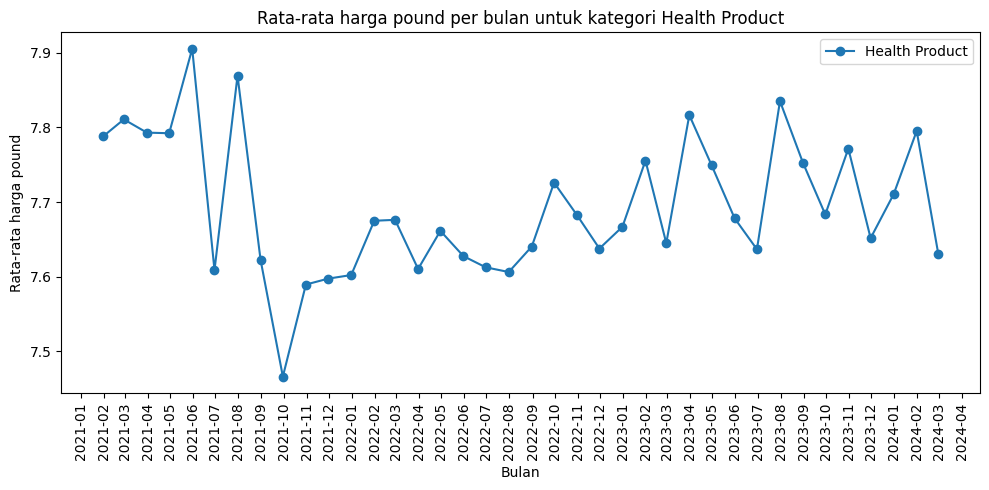

In [ ]:
# Create the time series plot for health_products
plt.figure(figsize=(10, 5))
plt.plot(monthly_health_uk['harga_pound'],'o-', label='Health Product')

# Add title and labels
plt.title('Rata-rata harga pound per bulan untuk kategori Health Product')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata harga pound')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
monthly_health_uk.describe()

harga_pound
count    38.000000
mean      7.694242
std       0.092851
min       7.466329
25%       7.628444
50%       7.675599
75%       7.767574
max       7.905361

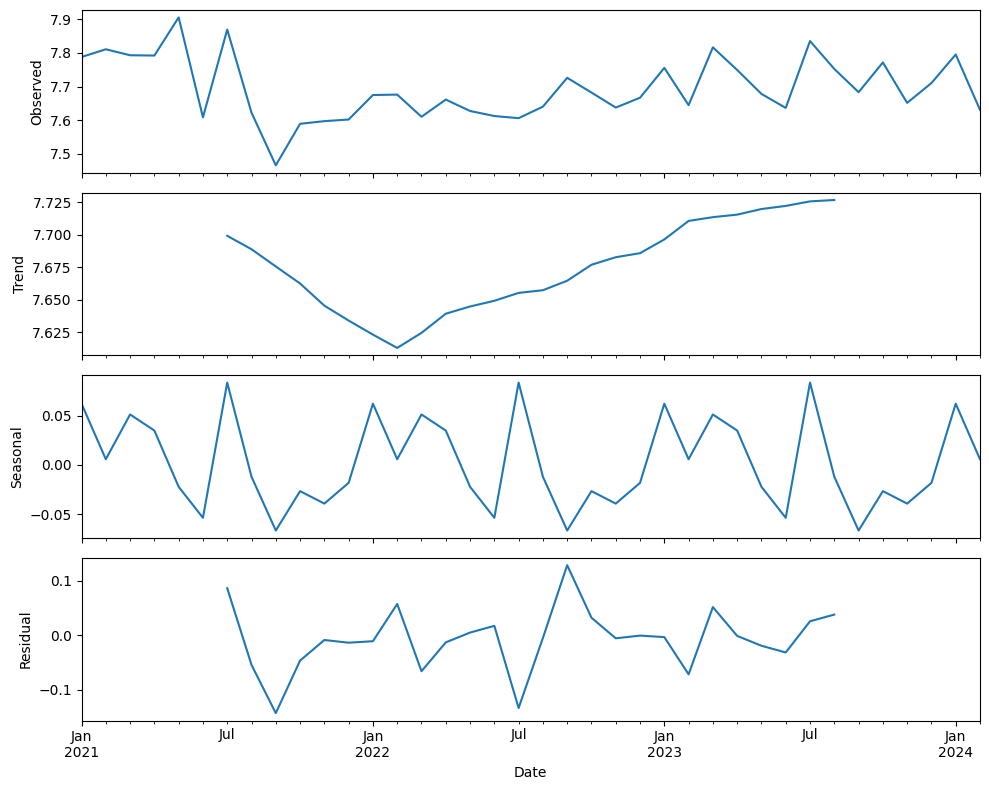

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthly_health_uk['harga_pound'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
#split data train test
split_index = int(len(monthly_health_uk) * 0.9)

# Bagi data menjadi train dan test berdasarkan indeks pembagi|
train = monthly_health_uk[:split_index]
test = monthly_health_uk[split_index:]

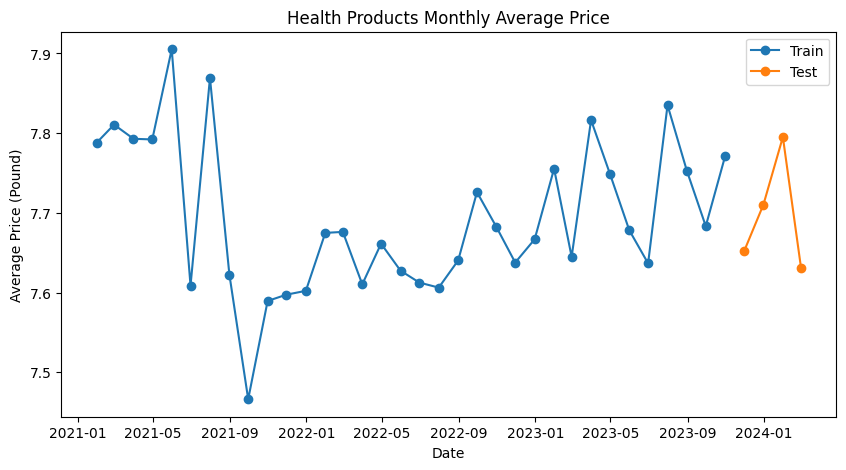

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, 'o-', label='Train')
plt.plot(test.index, test, 'o-', label='Test')
plt.xlabel('Date')
plt.ylabel('Average Price (Pound)')
plt.title('Health Products Monthly Average Price')
plt.legend()
plt.show()

In [ ]:
# melakukan uji ADF untuk mengecek stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}:{value}')

print('\nKesimpulan:')
if adf_test[1] <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -1.901868787285844
p-value: 0.3311824855579182
Critical Values:
1%:-3.6889256286443146
5%:-2.9719894897959187
10%:-2.6252957653061224

Kesimpulan:
(Gagal Tolak H0) Tidak stasioner


In [ ]:
# Lakukan differencing untuk membuat data menjadi stasioner
train_diff = train.diff().dropna()

In [ ]:
# melakukan uji ADF untuk mengecek stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train_diff)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}:{value}')

print('\nKesimpulan:')
if adf_test[1] <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -2.943903798501405
p-value: 0.04047562196574228
Critical Values:
1%:-3.6889256286443146
5%:-2.9719894897959187
10%:-2.6252957653061224

Kesimpulan:
(Tolak H0) ---> Stasioner


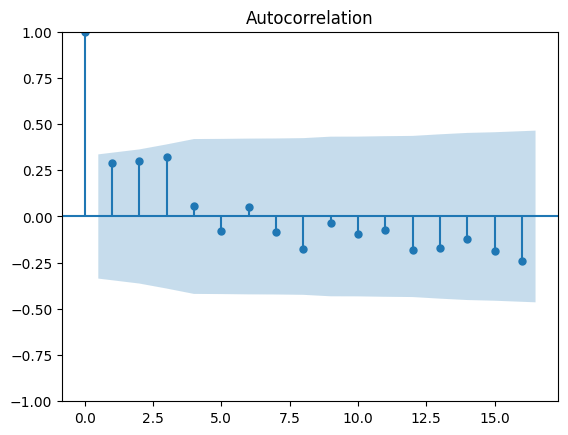

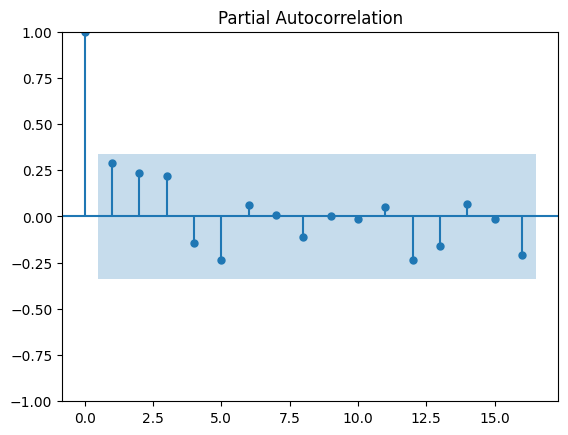

In [ ]:
#plot acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(train)
pacf = plot_pacf(train)

In [ ]:
# Define the model
model_uk = sm.tsa.SARIMAX(train,
                order=(1, 0, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 12))  # (P, D, Q, s)

# Fit the model
sarimax_model = model_uk.fit(disp=False)

# Print the summary
print(sarimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:            harga_pound   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  28.671
Date:                Wed, 05 Jun 2024   AIC                            -51.343
Time:                        05:55:02   BIC                            -46.764
Sample:                    01-31-2021   HQIC                           -49.781
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1295.461      0.000       0.998       1.002
ma.L1         -0.6448      0.148     -4.359      0.000      -0.935      -0.355
sigma2         0.0082      0.002      4.479      0.0

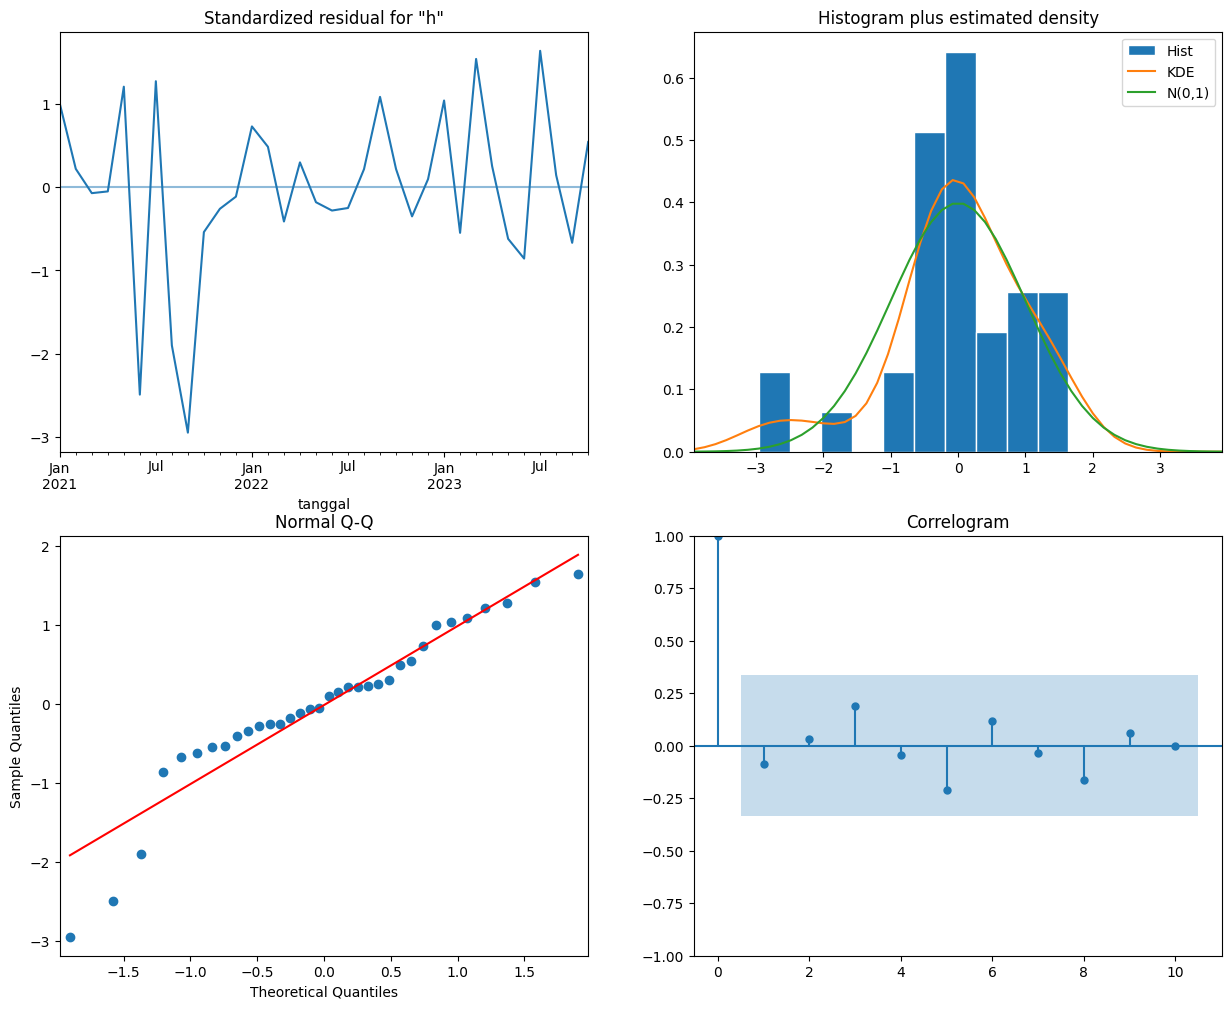

In [ ]:
# Model diagnostics
sarimax_model.plot_diagnostics(figsize=(15, 12))
plt.show()

###First Forecast

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = sarimax_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.07039018211396697
Test MAPE: 0.009168249098403526
Test RMSE: 0.07666838113519761


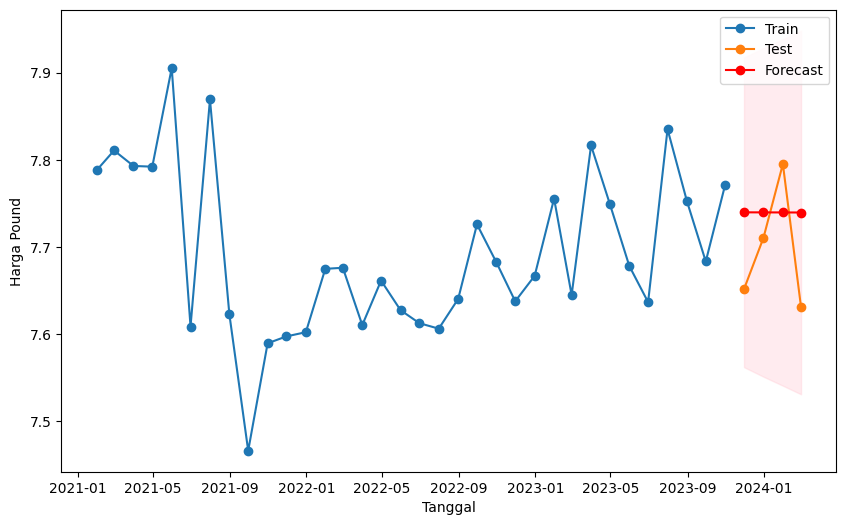

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

###Hyperparameter tuning

In [ ]:
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Hyperparameter tuning
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

Best SARIMAX(1, 0, 1)x(0, 0, 0, 12) - AIC:-55.41053440934091


###Forecast After Hyoerparameter Tuning

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.06710836255612507
Test MAPE: 0.008735116099220126
Test RMSE: 0.07289833323100063


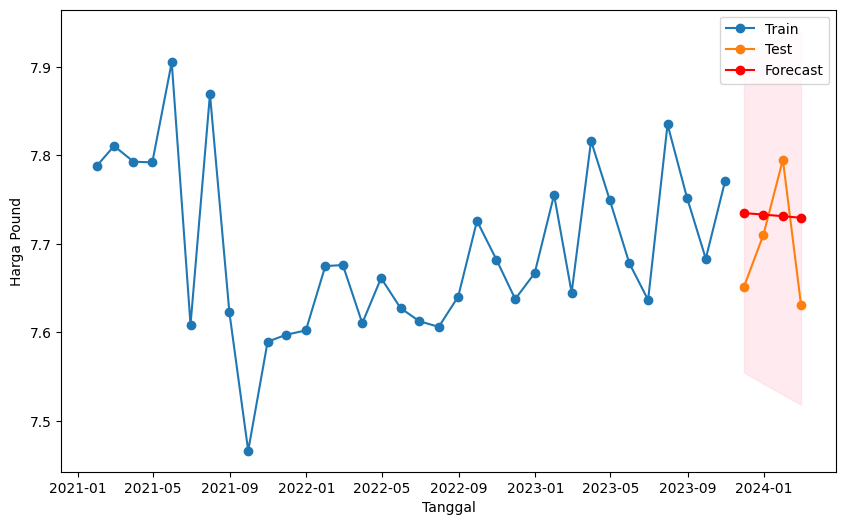

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

###Extract Data

In [ ]:
forecast_series.head()

tanggal
2023-11-30    7.734960
2023-12-31    7.733178
2024-01-31    7.731397
2024-02-29    7.729617
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
forecast_data = pd.Series({
    '2023-11-30': 7.734960,
    '2023-12-31': 7.733178,
    '2024-01-31': 7.731397,
    '2024-02-29': 7.729617
}, name='forecast')

In [ ]:
forecast_df = forecast_data.reset_index()
forecast_df.columns = ['tanggal', 'forecast']

In [ ]:
forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

In [ ]:
monthly_healthproduct1 = monthly_health_uk.reset_index()
monthly_healthproduct1['tanggal'] = pd.to_datetime(monthly_healthproduct1['tanggal'])

In [ ]:
forecast_uk = pd.merge(monthly_healthproduct1, forecast_df, on='tanggal', how='left')
forecast_uk.head()

tanggal  harga_pound  forecast
0 2021-01-31     7.787856       NaN
1 2021-02-28     7.810765       NaN
2 2021-03-31     7.793013       NaN
3 2021-04-30     7.792186       NaN
4 2021-05-31     7.905361       NaN

In [ ]:
forecast_uk['nama_toko'] = 'UKMart'

In [ ]:
forecast_uk.head()

tanggal  harga_pound  forecast nama_toko
0 2021-01-31     7.787856       NaN    UKMart
1 2021-02-28     7.810765       NaN    UKMart
2 2021-03-31     7.793013       NaN    UKMart
3 2021-04-30     7.792186       NaN    UKMart
4 2021-05-31     7.905361       NaN    UKMart

In [ ]:
print(forecast_uk.tail())

      tanggal  harga_pound  forecast nama_toko
33 2023-10-31     7.771585       NaN    UKMart
34 2023-11-30          NaN  7.734960    UKMart
35 2023-12-31          NaN  7.733178    UKMart
36 2024-01-31          NaN  7.731397    UKMart
37 2024-02-29          NaN  7.729617    UKMart


In [ ]:
forecast_uk.iloc[-4:, forecast_uk.columns.get_loc('harga_pound')] = np.nan

In [ ]:
print(forecast_uk.tail())

      tanggal  harga_pound  forecast nama_toko
33 2023-10-31     7.771585       NaN    UKMart
34 2023-11-30          NaN  7.734960    UKMart
35 2023-12-31          NaN  7.733178    UKMart
36 2024-01-31          NaN  7.731397    UKMart
37 2024-02-29          NaN  7.729617    UKMart


In [ ]:
#simpan data ke csv
forecast_uk.to_csv('uk_forecast.csv', index = False)

#**Scottish Mart**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library

In [ ]:
pip install pandas numpy matplotlib statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

### Import Dataset

In [ ]:
scotis = pd.read_csv('/content/drive/MyDrive/Dataset/ScottishMart.csv')
scotis

nama_toko  harga  harga_per_unit  unit  \
0        ScottishMart   0.40            0.00  unit   
1        ScottishMart   0.50            0.00  unit   
2        ScottishMart   0.60            0.00  unit   
3        ScottishMart   0.75            0.00  unit   
4        ScottishMart   0.98            0.00  unit   
...               ...    ...             ...   ...   
1158611  ScottishMart   3.00           60.00     l   
1158612  ScottishMart   3.00           10.90     l   
1158613  ScottishMart   1.50          150.00    kg   
1158614  ScottishMart  16.75            0.56  unit   
1158615  ScottishMart  19.00            0.63  unit   

                                                      nama         kategori  \
0                                 Swan Vesta Matches 1 Box        household   
1                                    Tesco 200 Cotton Buds  health_products   
2                                     Tesco Nappy Bags 300    baby_products   
3                          Fred & Flo Cotton Buds 300 Pack    baby_products   
4                          Stockwell & Co. Sweeteners 850S           drinks   
...                                                    ...              ...   
1158611  Simple Face Mask Detox & Brightening Clay Mask...  health_products   
1158612  Pantene Pro-V Hydrating Glow Quenching Hair Co...  health_products   
1158613  Beyond Nootropic Blue Raspberry Lemonade Suppl...  health_products   
1158614       Veet Expert Bikini & Underarm Wax Strips X30  health_products   
1158615               Optibac Probiotics For Women 30 Caps  health_products   

         brand_sendiri     tanggal  
0                False  2021-01-01  
1                 True  2021-01-01  
2                 True  2021-01-01  
3                 True  2021-01-01  
4                 True  2021-01-01  
...                ...         ...  
1158611          False  2021-05-27  
1158612          False  2021-05-28  
1158613          False  2021-05-29  
1158614          False  2021-05-30  
1158615          False  2021-05-31  

[1158616 rows x 8 columns]

In [ ]:
scotis = scotis.rename(columns={'harga':'harga_pound'})

### Missing Value

In [ ]:
missing_value = scotis.isnull().sum()
missing_value

nama_toko         0
harga_pound       0
harga_per_unit    1
unit              1
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
scotis['unit'].unique()

array(['unit', 'kg', 'l', 'm', nan], dtype=object)

In [ ]:
mv = scotis[scotis.isnull().any(axis=1)]
mv

nama_toko  harga_pound  harga_per_unit unit  \
483945  ScottishMart          0.0             NaN  NaN   

                                                nama       kategori  \
483945  Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   

        brand_sendiri     tanggal  
483945          False  2022-04-28

In [ ]:
name = scotis[scotis['nama'] == 'Twix Multipack Chocolate Bars Biscuits 9x20g']
name

nama_toko  harga_pound  harga_per_unit unit  \
8042     ScottishMart         2.35            13.1   kg   
32548    ScottishMart         2.35            13.1   kg   
57521    ScottishMart         2.35            13.1   kg   
81402    ScottishMart         2.35            13.1   kg   
103822   ScottishMart         2.35            13.1   kg   
128839   ScottishMart         2.35            13.1   kg   
152901   ScottishMart         2.35            13.1   kg   
175812   ScottishMart         2.35            13.1   kg   
201769   ScottishMart         2.35            13.1   kg   
236959   ScottishMart         2.35            13.1   kg   
250474   ScottishMart         2.35            13.1   kg   
272872   ScottishMart         2.35            13.1   kg   
295250   ScottishMart         2.35            13.1   kg   
321029   ScottishMart         2.35            13.1   kg   
341431   ScottishMart         2.35            13.1   kg   
363336   ScottishMart         2.35            13.1   kg   
387772   ScottishMart         2.35            13.1   kg   
407705   ScottishMart         2.35            13.1   kg   
449918   ScottishMart         2.35            13.1   kg   
461100   ScottishMart         2.35            13.1   kg   
483945   ScottishMart         0.00             NaN  NaN   
501999   ScottishMart         2.35            13.1   kg   
526297   ScottishMart         2.35            13.1   kg   
556570   ScottishMart         2.35            13.1   kg   
575510   ScottishMart         2.35            13.1   kg   
598768   ScottishMart         2.35            13.1   kg   
623193   ScottishMart         2.35            13.1   kg   
651600   ScottishMart         2.35            13.1   kg   
669906   ScottishMart         1.65             9.1   kg   
700628   ScottishMart         1.65             9.1   kg   
721323   ScottishMart         1.65             9.1   kg   
757927   ScottishMart         1.65             9.1   kg   
767655   ScottishMart         1.65             9.1   kg   
787806   ScottishMart         1.65             9.1   kg   
802238   ScottishMart         1.65             9.1   kg   
825348   ScottishMart         1.65             9.1   kg   
852783   ScottishMart         1.65             9.1   kg   
875979   ScottishMart         1.65             9.1   kg   
898492   ScottishMart         1.65             9.1   kg   
923958   ScottishMart         1.65             9.1   kg   
948301   ScottishMart         1.65             9.1   kg   
974993   ScottishMart         1.65             9.1   kg   
999263   ScottishMart         1.65             9.1   kg   
1023091  ScottishMart         1.65             9.1   kg   
1044932  ScottishMart         1.65             9.1   kg   
1070362  ScottishMart         1.65             9.1   kg   
1092480  ScottishMart         1.65             9.1   kg   
1119399  ScottishMart         1.65             9.1   kg   
1143773  ScottishMart         1.65             9.1   kg   

                                                 nama       kategori  \
8042     Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
32548    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
57521    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
81402    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
103822   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
128839   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
152901   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
175812   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
201769   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
236959   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
250474   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
272872   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
295250   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
321029   Twix Multipack Chocolate Bars Biscuits 9x20g

Jika dilihat dari missing value terdapat 1 data pada nama barang **Twix Multipack Chocolate Bars Biscuits 9x20g** yang tidak memiliki harga_unit harga_pound, dan unit, sehingga langkah selanjutnya untuk mengatasi missing value tersebut adalah mengisi data yang sama  berdasarkan data sebelumnya atau data sesudahnya

In [ ]:
condition = scotis['nama']== "Twix Multipack Chocolate Bars Biscuits 9x20g"
scotis['harga_pound'] = scotis['harga_pound'].replace(0.00, 2.35)
scotis.loc[condition, 'harga_per_unit'] = scotis.loc[condition, 'harga_per_unit'].fillna(13.1)
scotis.loc[condition, 'unit'] = scotis.loc[condition, 'unit'].fillna('kg')

In [ ]:
scotis[scotis['nama'] == 'Twix Multipack Chocolate Bars Biscuits 9x20g']

nama_toko  harga_pound  harga_per_unit unit  \
8042     ScottishMart         2.35            13.1   kg   
32548    ScottishMart         2.35            13.1   kg   
57521    ScottishMart         2.35            13.1   kg   
81402    ScottishMart         2.35            13.1   kg   
103822   ScottishMart         2.35            13.1   kg   
128839   ScottishMart         2.35            13.1   kg   
152901   ScottishMart         2.35            13.1   kg   
175812   ScottishMart         2.35            13.1   kg   
201769   ScottishMart         2.35            13.1   kg   
236959   ScottishMart         2.35            13.1   kg   
250474   ScottishMart         2.35            13.1   kg   
272872   ScottishMart         2.35            13.1   kg   
295250   ScottishMart         2.35            13.1   kg   
321029   ScottishMart         2.35            13.1   kg   
341431   ScottishMart         2.35            13.1   kg   
363336   ScottishMart         2.35            13.1   kg   
387772   ScottishMart         2.35            13.1   kg   
407705   ScottishMart         2.35            13.1   kg   
449918   ScottishMart         2.35            13.1   kg   
461100   ScottishMart         2.35            13.1   kg   
483945   ScottishMart         2.35            13.1   kg   
501999   ScottishMart         2.35            13.1   kg   
526297   ScottishMart         2.35            13.1   kg   
556570   ScottishMart         2.35            13.1   kg   
575510   ScottishMart         2.35            13.1   kg   
598768   ScottishMart         2.35            13.1   kg   
623193   ScottishMart         2.35            13.1   kg   
651600   ScottishMart         2.35            13.1   kg   
669906   ScottishMart         1.65             9.1   kg   
700628   ScottishMart         1.65             9.1   kg   
721323   ScottishMart         1.65             9.1   kg   
757927   ScottishMart         1.65             9.1   kg   
767655   ScottishMart         1.65             9.1   kg   
787806   ScottishMart         1.65             9.1   kg   
802238   ScottishMart         1.65             9.1   kg   
825348   ScottishMart         1.65             9.1   kg   
852783   ScottishMart         1.65             9.1   kg   
875979   ScottishMart         1.65             9.1   kg   
898492   ScottishMart         1.65             9.1   kg   
923958   ScottishMart         1.65             9.1   kg   
948301   ScottishMart         1.65             9.1   kg   
974993   ScottishMart         1.65             9.1   kg   
999263   ScottishMart         1.65             9.1   kg   
1023091  ScottishMart         1.65             9.1   kg   
1044932  ScottishMart         1.65             9.1   kg   
1070362  ScottishMart         1.65             9.1   kg   
1092480  ScottishMart         1.65             9.1   kg   
1119399  ScottishMart         1.65             9.1   kg   
1143773  ScottishMart         1.65             9.1   kg   

                                                 nama       kategori  \
8042     Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
32548    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
57521    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
81402    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
103822   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
128839   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
152901   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
175812   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
201769   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
236959   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
250474   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
272872   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
295250   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
321029   Twix Multipack Chocolate Bars Biscuits 9x20g

### Duplicate Data

In [ ]:
duplicate = scotis.duplicated().sum()
duplicate

270

Pada toko Scottish Mart terdapat 270 data yang duplicate sehingga langkah yang akan diambil adalah menghapus data tersebut

In [ ]:
#hapus data duplikat
scotis.drop_duplicates()

nama_toko  harga_pound  harga_per_unit  unit  \
0        ScottishMart         0.40            0.00  unit   
1        ScottishMart         0.50            0.00  unit   
2        ScottishMart         0.60            0.00  unit   
3        ScottishMart         0.75            0.00  unit   
4        ScottishMart         0.98            0.00  unit   
...               ...          ...             ...   ...   
1158611  ScottishMart         3.00           60.00     l   
1158612  ScottishMart         3.00           10.90     l   
1158613  ScottishMart         1.50          150.00    kg   
1158614  ScottishMart        16.75            0.56  unit   
1158615  ScottishMart        19.00            0.63  unit   

                                                      nama         kategori  \
0                                 Swan Vesta Matches 1 Box        household   
1                                    Tesco 200 Cotton Buds  health_products   
2                                     Tesco Nappy Bags 300    baby_products   
3                          Fred & Flo Cotton Buds 300 Pack    baby_products   
4                          Stockwell & Co. Sweeteners 850S           drinks   
...                                                    ...              ...   
1158611  Simple Face Mask Detox & Brightening Clay Mask...  health_products   
1158612  Pantene Pro-V Hydrating Glow Quenching Hair Co...  health_products   
1158613  Beyond Nootropic Blue Raspberry Lemonade Suppl...  health_products   
1158614       Veet Expert Bikini & Underarm Wax Strips X30  health_products   
1158615               Optibac Probiotics For Women 30 Caps  health_products   

         brand_sendiri     tanggal  
0                False  2021-01-01  
1                 True  2021-01-01  
2                 True  2021-01-01  
3                 True  2021-01-01  
4                 True  2021-01-01  
...                ...         ...  
1158611          False  2021-05-27  
1158612          False  2021-05-28  
1158613          False  2021-05-29  
1158614          False  2021-05-30  
1158615          False  2021-05-31  

[1158346 rows x 8 columns]

In [ ]:
scotis.to_csv('Scottish_clean.csv', index = False)

In [ ]:
sc_health_product = scotis[scotis['kategori'] == 'health_products']

In [ ]:
sc_health = sc_health_product[['tanggal','harga_pound']]
sc_health=pd.DataFrame(sc_health)
sc_health['tanggal']=pd.to_datetime(sc_health['tanggal'])
sc_health.head()

tanggal  harga_pound
1  2021-01-01         0.50
23 2021-01-01         0.40
27 2021-01-01         1.00
34 2021-01-01         1.50
37 2021-01-01         2.25

In [ ]:
scot = sc_health.set_index('tanggal')

In [ ]:
monthly_health_sc = scot.resample('M').mean()
monthly_health_sc.head()

harga_pound
tanggal                
2021-01-31     6.633836
2021-02-28     7.006630
2021-03-31     7.511294
2021-04-30     7.442022
2021-05-31     6.738129

In [ ]:
sc_health['tanggal'] = pd.to_datetime(sc_health['tanggal'])
print(scotis.describe())

        harga_pound  harga_per_unit                        tanggal
count  1.158616e+06    1.158616e+06                        1158616
mean   5.218543e+00    3.626164e+01  2022-07-31 22:25:47.313691392
min    1.000000e-01    0.000000e+00            2021-01-01 00:00:00
25%    1.750000e+00    3.330000e+00            2021-10-16 00:00:00
50%    3.000000e+00    8.000000e+00            2022-08-01 00:00:00
75%    6.000000e+00    1.600000e+01            2023-05-17 00:00:00
max    1.600000e+02    1.500000e+05            2024-02-29 00:00:00
std    6.718666e+00    2.448023e+02                            NaN


In [ ]:
sc_health

tanggal  harga_pound
1       2021-01-01         0.50
23      2021-01-01         0.40
27      2021-01-01         1.00
34      2021-01-01         1.50
37      2021-01-01         2.25
...            ...          ...
1158611 2021-05-27         3.00
1158612 2021-05-28         3.00
1158613 2021-05-29         1.50
1158614 2021-05-30        16.75
1158615 2021-05-31        19.00

[196650 rows x 2 columns]

In [ ]:
top_selling_products =sc_health_product['nama'].value_counts().head(10)
print("\nTop 10 Selling Products by Frequency:")
print(top_selling_products)


Top 10 Selling Products by Frequency:
nama
Eco Warrior Shampoo Bar Argan & Coconut 100G                48
Radox Pomegranate & Apple Feel Ready Shower Gel 225ml       48
Simple Kind To Skin Rich Moisture Sheet Mask 21Ml           48
Garnier Skin Active Night Time Face Bomb Tissue Mask 32G    48
Rimmel Lipgloss Oh My Gloss Stay Rose 6.5Ml                 48
Rimmel Lipgloss Oh My Gloss Snog 6.5Ml                      48
Eylure Dybrow Mid Brown                                     48
Eylure Dybrow Brown                                         48
Tresemme Rich Luxuries Moisture Conditioner900ml            48
Real Techniques Powder Brush                                48
Name: count, dtype: int64


In [ ]:

brand_vs_non_brand = sc_health_product['brand_sendiri'].value_counts()
print("\nBrand vs Non-Brand Distribution:")
print(brand_vs_non_brand)


Brand vs Non-Brand Distribution:
brand_sendiri
False    184689
True      11961
Name: count, dtype: int64


### Plot Data

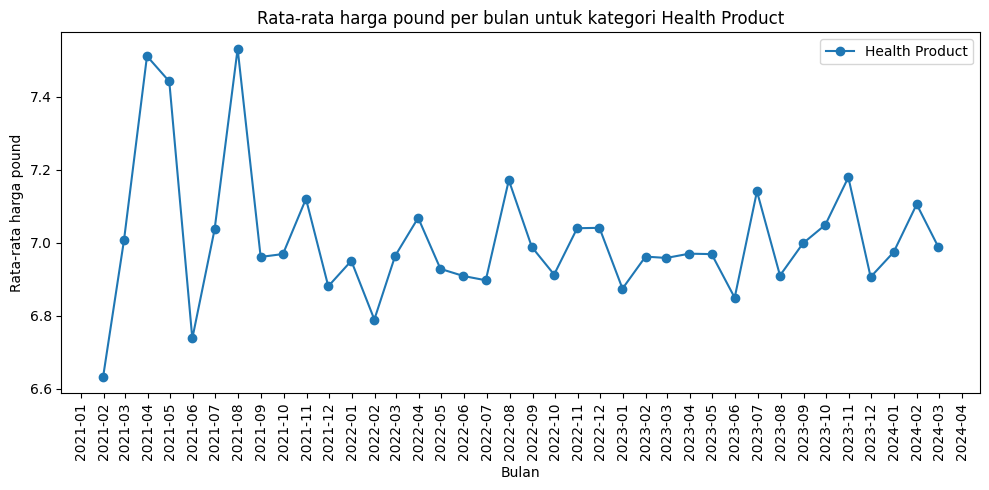

In [ ]:
# Create the time series plot for health_products
plt.figure(figsize=(10, 5))
plt.plot(monthly_health_sc['harga_pound'],'o-', label='Health Product')

# Add title and labels
plt.title('Rata-rata harga pound per bulan untuk kategori Health Product')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata harga pound')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

####Cek Dekomposisi Data

In [ ]:
monthly_health_sc.describe()

harga_pound
count    38.000000
mean      7.008865
std       0.181181
min       6.633836
25%       6.911234
50%       6.969872
75%       7.047250
max       7.531562

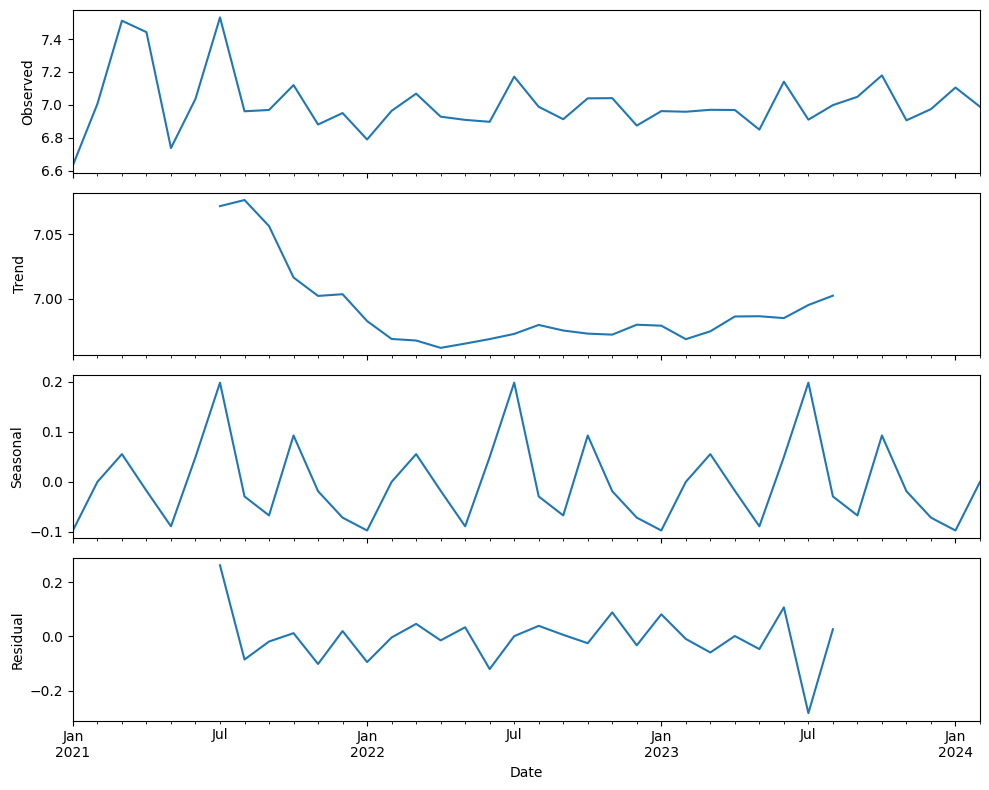

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthly_health_sc['harga_pound'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

####Split Data

In [ ]:
#split data train test
split_index = int(len(monthly_health_sc) * 0.9)

# Bagi data menjadi train dan test berdasarkan indeks pembagi
train = monthly_health_sc[:split_index]
test = monthly_health_sc[split_index:]

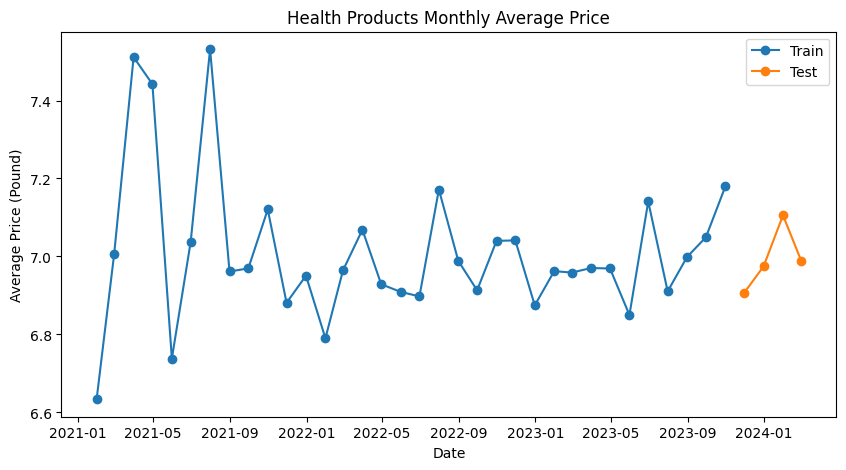

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, 'o-', label='Train')
plt.plot(test.index, test, 'o-', label='Test')
plt.xlabel('Date')
plt.ylabel('Average Price (Pound)')
plt.title('Health Products Monthly Average Price')
plt.legend()
plt.show()

####Cek Stasioneritas

In [ ]:
# melakukan uji ADF untuk mengecek stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}:{value}')

print('\nKesimpulan:')
if adf_test[1] <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -2.9001177821268405
p-value: 0.045334302727697014
Critical Values:
1%:-3.6996079738860943
5%:-2.9764303469999494
10%:-2.627601001371742

Kesimpulan:
(Tolak H0) ---> Stasioner


####Plot ACF dan PACF

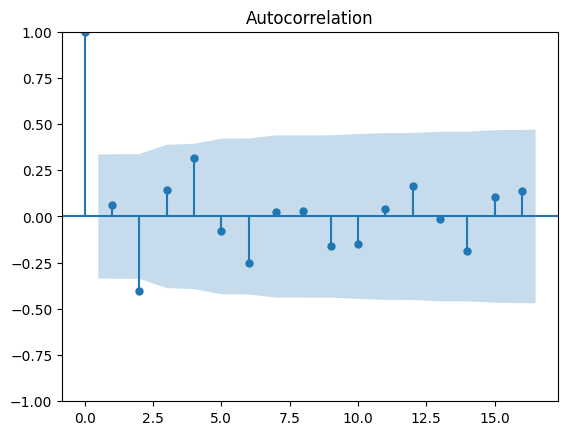

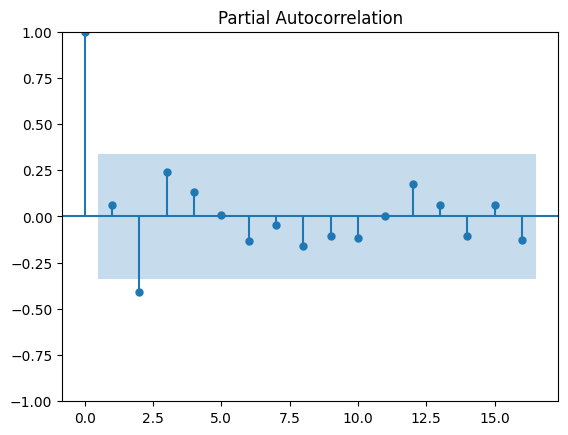

In [ ]:
#plot acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(train)
pacf = plot_pacf(train)

####Modeling SARIMAX

In [ ]:
# Define the model
model_sc = sm.tsa.SARIMAX(train,
                order=(1, 0, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 12))  # (P, D, Q, s)

# Fit the model
sarimax_model = model_sc.fit(disp=False)

# Print the summary
print(sarimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:            harga_pound   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                   2.823
Date:                Wed, 05 Jun 2024   AIC                              0.355
Time:                        07:57:34   BIC                              4.934
Sample:                    01-31-2021   HQIC                             1.917
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.64e-06   2.75e+05      0.000       1.000       1.000
ma.L1         -0.9893      0.346     -2.860      0.004      -1.667      -0.311
sigma2         0.0366      0.018      2.024      0.0

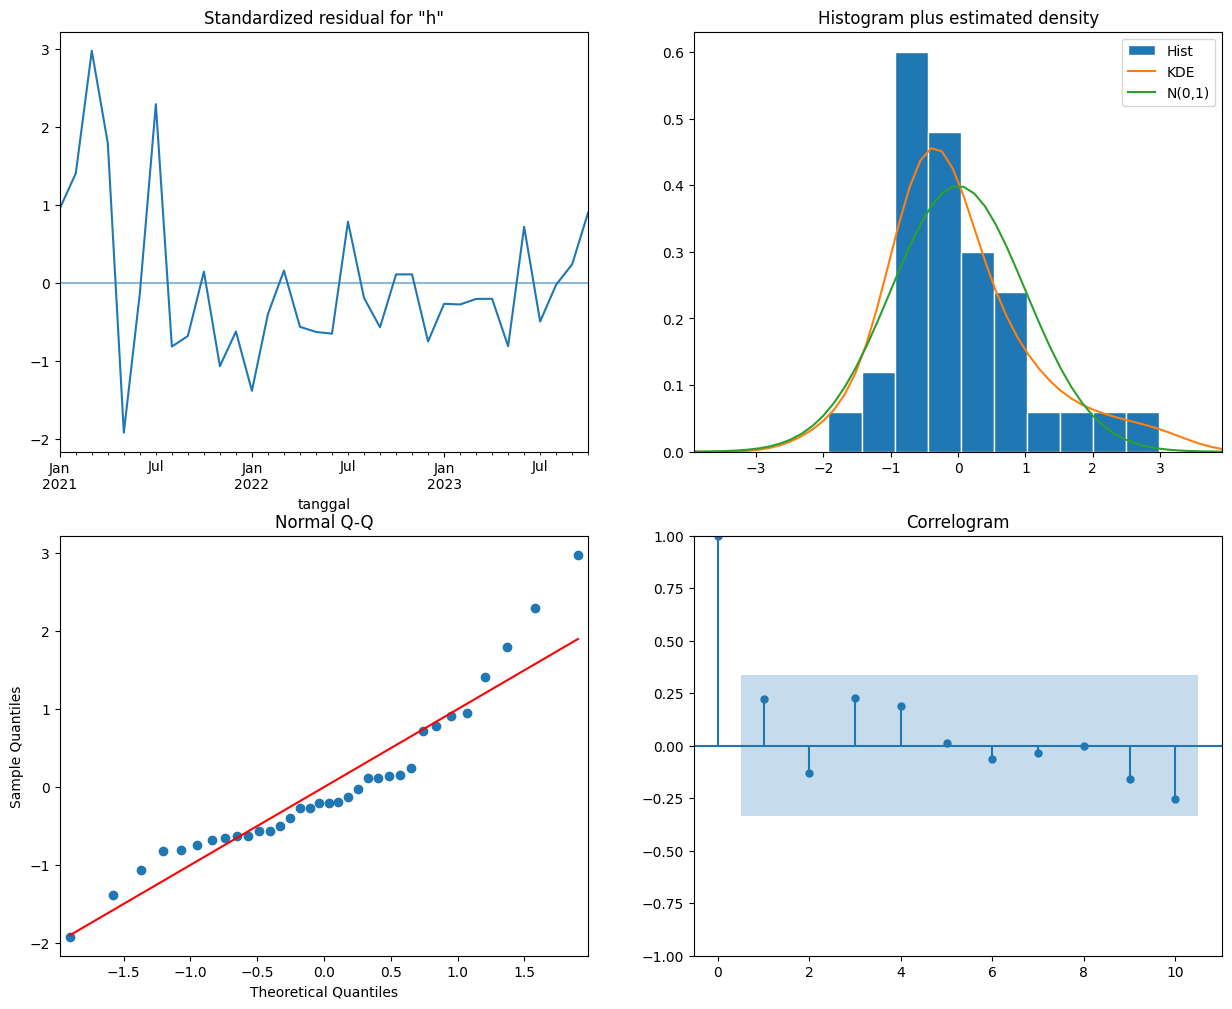

In [ ]:
# Model diagnostics
sarimax_model.plot_diagnostics(figsize=(15, 12))
plt.show()

### Forecast Before

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = sarimax_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.06393058691297204
Test MAPE: 0.009138222513320794
Test RMSE: 0.07342345148215093


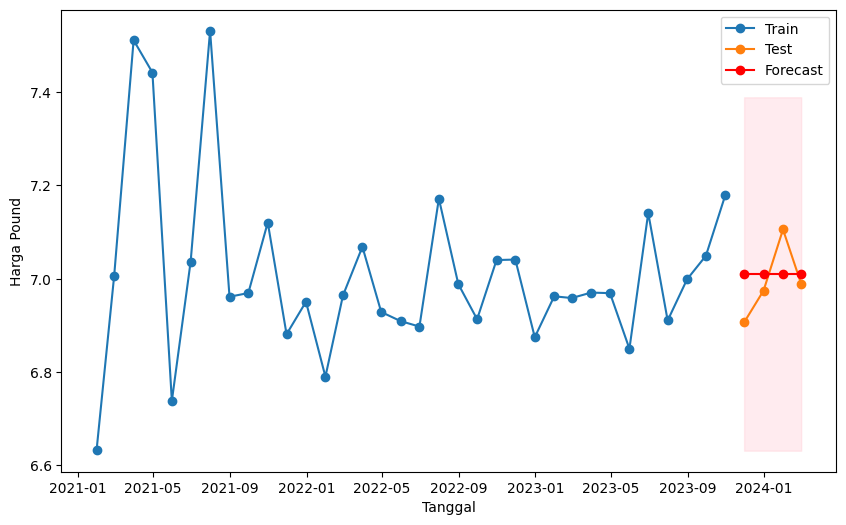

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

####Hyperparameter Tuning

In [ ]:
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Hyperparameter tuning
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

Best SARIMAX(0, 1, 2)x(1, 0, 0, 12) - AIC:-35.893504040139774


### Forecast After

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.07638424712887115
Test MAPE: 0.01097063285807749
Test RMSE: 0.08923364464268028


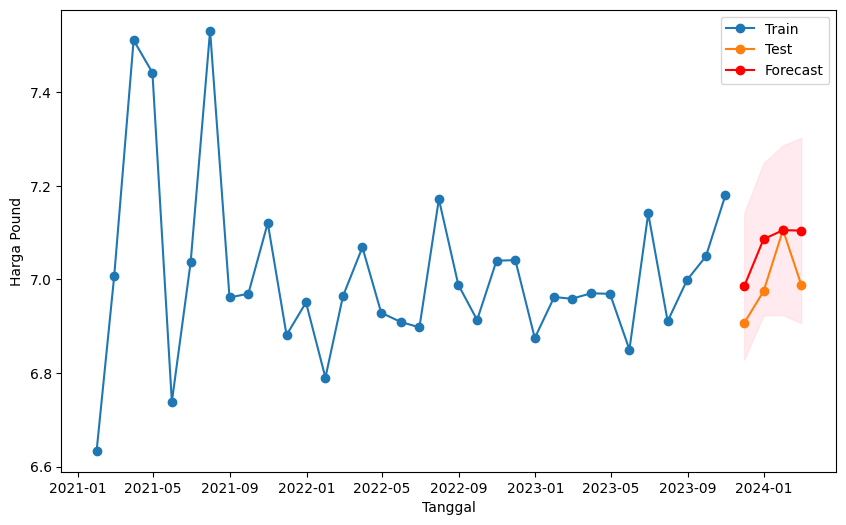

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

####Extract Data

In [ ]:
forecast_data = pd.Series({
    '2023-11-30': 6.984997,
    '2023-12-31': 7.086013,
    '2024-01-31': 7.105199,
    '2024-02-29': 7.104398
}, name='forecast')

In [ ]:
forecast_df = forecast_data.reset_index()
forecast_df.columns = ['tanggal', 'forecast']

In [ ]:
forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

In [ ]:
monthly_healthproduct1 = monthly_health_sc.reset_index()
monthly_healthproduct1['tanggal'] = pd.to_datetime(monthly_healthproduct1['tanggal'])

In [ ]:
forecast_scottish = pd.merge(monthly_healthproduct1, forecast_df, on='tanggal', how='left')
forecast_scottish.head()

tanggal  harga_pound  forecast
0 2021-01-31     6.633836       NaN
1 2021-02-28     7.006630       NaN
2 2021-03-31     7.511294       NaN
3 2021-04-30     7.442022       NaN
4 2021-05-31     6.738129       NaN

In [ ]:
forecast_scottish['nama_toko'] = 'ScottishMart'

In [ ]:
forecast_scottish.head()

tanggal  harga_pound  forecast     nama_toko
0 2021-01-31     6.633836       NaN  ScottishMart
1 2021-02-28     7.006630       NaN  ScottishMart
2 2021-03-31     7.511294       NaN  ScottishMart
3 2021-04-30     7.442022       NaN  ScottishMart
4 2021-05-31     6.738129       NaN  ScottishMart

In [ ]:
forecast_scottish.iloc[-4:, forecast_scottish.columns.get_loc('harga_pound')] = np.nan

In [ ]:
print(forecast_scottish.tail())

      tanggal  harga_pound  forecast     nama_toko
33 2023-10-31     7.179457       NaN  ScottishMart
34 2023-11-30          NaN  6.984997  ScottishMart
35 2023-12-31          NaN  7.086013  ScottishMart
36 2024-01-31          NaN  7.105199  ScottishMart
37 2024-02-29          NaN  7.104398  ScottishMart


In [ ]:
#simpan data ke csv
forecast_scottish.to_csv('Scottish_forecast.csv', index = False)

#**CV Famz**

###**Import Dataset**

In [ ]:
cv_famz = pd.read_csv("/content/drive/MyDrive/Dataset/CVFamz.csv")
cv_famz

<ipython-input-7-010ba33300e6>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  cv_famz = pd.read_csv("/content/drive/MyDrive/Dataset/CVFamz.csv")


nama_toko  harga_pound  harga_per_unit  unit  \
0          CVFamz        45.00           45.00  unit   
1          CVFamz        55.00           55.00  unit   
2          CVFamz        20.00            4.00     m   
3          CVFamz         3.65            0.73  unit   
4          CVFamz        17.00           17.00  unit   
...           ...          ...             ...   ...   
1299183    CVFamz         8.00            8.00  unit   
1299184    CVFamz         6.00            6.00  unit   
1299185    CVFamz        23.00            0.38     l   
1299186    CVFamz         5.00           28.20     l   
1299187    CVFamz        10.00           50.00     l   

                                                      nama kategori  \
0          TP-Link Tapo C310 Outdoor Security Wi-Fi Camera     home   
1                         Amazon Echo Dot 5Th Gen Charcoal     home   
2            Energizer UK 3 Pin Smart 5m Flexi Strip Light     home   
3        Status Electrical PVC Insulating Tape 10 Metre...     home   
4                 Wahl Colour Trim Stubble & Beard Trimmer     home   
...                                                    ...      ...   
1299183                Polar Gear Pup Friends Combo Cooler   drinks   
1299184     Eco Wix Ombre Grey Spa Waters Large Jar Candle   drinks   
1299185             Soda Stream Quick Connect CO2 Cylinder   drinks   
1299186  OGX Argan Oil of Morocco Miracle Water Conditi...   drinks   
1299187  L'Oreal Elvive Colour Protect 8 Second Wonder ...   drinks   

        brand_sendiri     tanggal  
0               False  2021-01-01  
1               False  2021-01-01  
2               False  2021-01-01  
3               False  2021-01-01  
4               False  2021-01-01  
...               ...         ...  
1299183         False  2023-08-22  
1299184         False  2023-08-23  
1299185         False  2023-08-24  
1299186         False  2023-08-25  
1299187          True  2023-08-26  

[1299188 rows x 8 columns]

In [ ]:
cv_famz['unit'].unique()

array(['unit', 'm', 'l', 'kg', nan], dtype=object)

In [ ]:
cv_famz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299188 entries, 0 to 1299187
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1299188 non-null  object 
 1   harga_pound     1299184 non-null  float64
 2   harga_per_unit  1299078 non-null  float64
 3   unit            1299078 non-null  object 
 4   nama            1299167 non-null  object 
 5   kategori        1299188 non-null  object 
 6   brand_sendiri   1299167 non-null  object 
 7   tanggal         1299188 non-null  object 
dtypes: float64(2), object(6)
memory usage: 79.3+ MB


Berdasarkan pengecekan yang telah dilakukan, diketahui dataset ini terdiri atas 8 kolom namun terdapat perbedaan jumlah data pada beberapa kolom. Hal ini mengindikasikan adanya missing value sehingga perlu dilakukan tindaklanjut. Selain itu, terdapat type kolom yang tidak sesuai yaitu pada kolom 'tanggal' yang kemudian akan diubah tipenya menjadi datetime.

###**Sesuaikan Tipe Data**

In [ ]:
#ubah tipe kolom tanggal ke datetime
cv_famz['tanggal'] = pd.to_datetime(cv_famz['tanggal'])

In [ ]:
cv_famz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299188 entries, 0 to 1299187
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   nama_toko       1299188 non-null  object        
 1   harga_pound     1299184 non-null  float64       
 2   harga_per_unit  1299078 non-null  float64       
 3   unit            1299078 non-null  object        
 4   nama            1299167 non-null  object        
 5   kategori        1299188 non-null  object        
 6   brand_sendiri   1299167 non-null  object        
 7   tanggal         1299188 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 79.3+ MB


Setelah dilakukan perubahan tipe data pada kolom 'tanggal' dari object menjadi datetime, maka tipe data pada setiap kolom sudah sesuai.

###**Missing Value**

In [ ]:
#cek missing value
cv_famz.isnull().sum()

nama_toko           0
harga_pound         4
harga_per_unit    110
unit              110
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

In [ ]:
mv = cv_famz[cv_famz.isnull().any(axis=1)]
mv

nama_toko  harga_pound  harga_per_unit unit  \
10349      CVFamz        35.25             NaN  NaN   
10359      CVFamz         7.80             NaN  NaN   
50690      CVFamz        35.25             NaN  NaN   
50695      CVFamz         7.80             NaN  NaN   
61415      CVFamz        35.25             NaN  NaN   
61420      CVFamz         7.80             NaN  NaN   
99451      CVFamz        35.25             NaN  NaN   
99462      CVFamz         7.80             NaN  NaN   
116155     CVFamz        35.25             NaN  NaN   
116167     CVFamz         7.80             NaN  NaN   
137786     CVFamz        35.25             NaN  NaN   
137795     CVFamz         7.80             NaN  NaN   
171837     CVFamz        35.25             NaN  NaN   
171848     CVFamz         7.80             NaN  NaN   
181409     CVFamz          NaN             NaN  NaN   
212407     CVFamz        35.25             NaN  NaN   
212414     CVFamz         7.80             NaN  NaN   
223998     CVFamz        35.25             NaN  NaN   
230445     CVFamz         7.80             NaN  NaN   
252421     CVFamz        35.25             NaN  NaN   
258372     CVFamz         7.80             NaN  NaN   
280403     CVFamz        35.25             NaN  NaN   
286299     CVFamz         7.80             NaN  NaN   
307783     CVFamz        35.25             NaN  NaN   
312675     CVFamz         7.80             NaN  NaN   
334735     CVFamz        35.25             NaN  NaN   
340347     CVFamz         7.80             NaN  NaN   
364371     CVFamz        35.25             NaN  NaN   
366752     CVFamz         7.80             NaN  NaN   
390210     CVFamz        35.25             NaN  NaN   
392827     CVFamz         7.80             NaN  NaN   
419802     CVFamz        35.25             NaN  NaN   
422248     CVFamz         7.80             NaN  NaN   
446228     CVFamz        35.25             NaN  NaN   
449089     CVFamz         7.80             NaN  NaN   
474045     CVFamz        35.25             NaN  NaN   
476536     CVFamz         7.80             NaN  NaN   
500286     CVFamz        35.25             NaN  NaN   
502217     CVFamz         7.80             NaN  NaN   
527758     CVFamz        35.25             NaN  NaN   
530770     CVFamz         7.80             NaN  NaN   
552631     CVFamz        35.25             NaN  NaN   
556289     CVFamz         7.80             NaN  NaN   
581560     CVFamz        35.25             NaN  NaN   
584506     CVFamz         7.80             NaN  NaN   
608429     CVFamz        35.25             NaN  NaN   
611286     CVFamz         7.80             NaN  NaN   
625820     CVFamz          NaN             NaN  NaN   
634182     CVFamz        35.25             NaN  NaN   
637752     CVFamz         7.80             NaN  NaN   
661674     CVFamz        35.25             NaN  NaN   
664209     CVFamz         7.80             NaN  NaN   
689855     CVFamz        35.25             NaN  NaN   
693342     CVFamz         7.80             NaN  NaN   
706697     CVFamz         1.29             3.9    l   
713147     CVFamz         1.29             3.9    l   
717271     CVFamz        35.25             NaN  NaN   
720773     CVFamz         7.80             NaN  NaN   
739382     CVFamz         1.29             3.9    l   
744189     CVFamz        35.25             NaN  NaN   
747125     CVFamz         7.80             NaN  NaN   
762155     CVFamz         1.29             3.9    l   
767255     CVFamz        35.25             NaN  NaN   
770034     CVFamz         7.80             NaN  NaN   
791571     CVFamz         1.29             3.9    l   
796202     CVFamz        35.25             NaN  NaN   
798636     CVFamz         7.80             NaN  NaN   
817111     CVFamz         1.29             3.9    l   
822062     CVFamz        35.25             NaN  NaN   
824629     CVFamz         7.80             NaN  NaN   
845759     CVFamz         1.29             3.9    l   
851393     CVFamz        35.25             NaN  

In [ ]:
mv['nama'].unique()

array(['Signature Red Filter Multipack 5x10 Cigars',
       'Signature Original Cigars', nan,
       'Original Source Tingly Mint & Tea Tree Shower Refill',
       'Original Source Tropical Coconut & Shea Butter Shower Refill'],
      dtype=object)

Setelah dilakukan pengecekan missing value, terdapat beberapa kolom yang memiliki missing value, yaitu kolom harga_pound sebanyak 4 data, harga_per_unit sebanyak 110 data, unit sebanyak 110 data, nama sebanyak 21 data, dan brand_sendiri sebanyak 21 data.

Selanjutnya akan dilakukan pengecekan pada data missing value berdasarkan nama produk dan di handle.

In [ ]:
a1 = cv_famz[cv_famz['nama'] == 'Signature Original Cigars']
a1

nama_toko  harga_pound  harga_per_unit unit  \
10359      CVFamz          7.8             NaN  NaN   
50695      CVFamz          7.8             NaN  NaN   
61420      CVFamz          7.8             NaN  NaN   
99462      CVFamz          7.8             NaN  NaN   
116167     CVFamz          7.8             NaN  NaN   
137795     CVFamz          7.8             NaN  NaN   
171848     CVFamz          7.8             NaN  NaN   
212414     CVFamz          7.8             NaN  NaN   
230445     CVFamz          7.8             NaN  NaN   
258372     CVFamz          7.8             NaN  NaN   
286299     CVFamz          7.8             NaN  NaN   
312675     CVFamz          7.8             NaN  NaN   
340347     CVFamz          7.8             NaN  NaN   
366752     CVFamz          7.8             NaN  NaN   
392827     CVFamz          7.8             NaN  NaN   
422248     CVFamz          7.8             NaN  NaN   
449089     CVFamz          7.8             NaN  NaN   
476536     CVFamz          7.8             NaN  NaN   
502217     CVFamz          7.8             NaN  NaN   
530770     CVFamz          7.8             NaN  NaN   
556289     CVFamz          7.8             NaN  NaN   
584506     CVFamz          7.8             NaN  NaN   
611286     CVFamz          7.8             NaN  NaN   
637752     CVFamz          7.8             NaN  NaN   
664209     CVFamz          7.8             NaN  NaN   
693342     CVFamz          7.8             NaN  NaN   
720773     CVFamz          7.8             NaN  NaN   
747125     CVFamz          7.8             NaN  NaN   
770034     CVFamz          7.8             NaN  NaN   
798636     CVFamz          7.8             NaN  NaN   
824629     CVFamz          7.8             NaN  NaN   
852835     CVFamz          7.8             NaN  NaN   
879933     CVFamz          7.8             NaN  NaN   
907214     CVFamz          7.8             NaN  NaN   
931467     CVFamz          7.8             NaN  NaN   
955794     CVFamz          7.8             NaN  NaN   
1005102    CVFamz          7.8             NaN  NaN   
1030040    CVFamz          7.8             NaN  NaN   
1055308    CVFamz          7.8             NaN  NaN   
1080500    CVFamz          7.8             NaN  NaN   
1102732    CVFamz          7.8             NaN  NaN   
1131728    CVFamz          7.8             NaN  NaN   
1156439    CVFamz          7.8             NaN  NaN   
1183247    CVFamz          7.8             NaN  NaN   
1208644    CVFamz          7.8             NaN  NaN   
1232880    CVFamz          7.8             NaN  NaN   
1257709    CVFamz          7.8             NaN  NaN   

                              nama kategori brand_sendiri    tanggal  
10359    Signature Original Cigars     home         False 2021-01-10  
50695    Signature Original Cigars     home         False 2021-02-15  
61420    Signature Original Cigars     home         False 2021-02-24  
99462    Signature Original Cigars     home         False 2021-03-30  
116167   Signature Original Cigars     home         False 2021-04-14  
137795   Signature Original Cigars     home         False 2021-05-03  
171848   Signature Original Cigars     home         False 2021-06-02  
212414   Signature Original Cigars     home         False 2021-07-08  
230445   Signature Original Cigars     home         False 2021-07-25  
258372   Signature Original Cigars     home         False 2021-08-18  
286299   Signature Original Cigars     home         False 2021-09-12  
312675   Signature Original Cigars     home         False 2021-10-06  
340347   Signature Original Cigars     home         False 2021-10-30  
366752   Signature Original Cigars     home         False 2021-11-23  
392827   Signature Original Cigars     home         False 2021-12-16  
422248   Signature Original Cigars     home         False 2022-01-11  
449089   Signature Original Cigars     home         False 2022-02-04  
476536   Signature Original Cigars     home         False 2022-02-28  
502217   Signature

In [ ]:
a2 = cv_famz[cv_famz['nama'] == 'Signature Red Filter Multipack 5x10 Cigars']
a2

nama_toko  harga_pound  harga_per_unit unit  \
10349      CVFamz        35.25             NaN  NaN   
50690      CVFamz        35.25             NaN  NaN   
61415      CVFamz        35.25             NaN  NaN   
99451      CVFamz        35.25             NaN  NaN   
116155     CVFamz        35.25             NaN  NaN   
137786     CVFamz        35.25             NaN  NaN   
171837     CVFamz        35.25             NaN  NaN   
212407     CVFamz        35.25             NaN  NaN   
223998     CVFamz        35.25             NaN  NaN   
252421     CVFamz        35.25             NaN  NaN   
280403     CVFamz        35.25             NaN  NaN   
307783     CVFamz        35.25             NaN  NaN   
334735     CVFamz        35.25             NaN  NaN   
364371     CVFamz        35.25             NaN  NaN   
390210     CVFamz        35.25             NaN  NaN   
419802     CVFamz        35.25             NaN  NaN   
446228     CVFamz        35.25             NaN  NaN   
474045     CVFamz        35.25             NaN  NaN   
500286     CVFamz        35.25             NaN  NaN   
527758     CVFamz        35.25             NaN  NaN   
552631     CVFamz        35.25             NaN  NaN   
581560     CVFamz        35.25             NaN  NaN   
608429     CVFamz        35.25             NaN  NaN   
634182     CVFamz        35.25             NaN  NaN   
661674     CVFamz        35.25             NaN  NaN   
689855     CVFamz        35.25             NaN  NaN   
717271     CVFamz        35.25             NaN  NaN   
744189     CVFamz        35.25             NaN  NaN   
767255     CVFamz        35.25             NaN  NaN   
796202     CVFamz        35.25             NaN  NaN   
822062     CVFamz        35.25             NaN  NaN   
851393     CVFamz        35.25             NaN  NaN   
877996     CVFamz        35.25             NaN  NaN   
904725     CVFamz        35.25             NaN  NaN   
930143     CVFamz        35.25             NaN  NaN   
954865     CVFamz        35.25             NaN  NaN   
999674     CVFamz        35.25             NaN  NaN   
1024593    CVFamz        35.25             NaN  NaN   
1052348    CVFamz        35.25             NaN  NaN   
1075561    CVFamz        35.25             NaN  NaN   
1122249    CVFamz        35.25             NaN  NaN   
1128850    CVFamz        35.25             NaN  NaN   
1153536    CVFamz        35.25             NaN  NaN   
1180298    CVFamz        35.25             NaN  NaN   
1205154    CVFamz        35.25             NaN  NaN   
1230949    CVFamz        35.25             NaN  NaN   
1254655    CVFamz        35.25             NaN  NaN   

                                               nama kategori brand_sendiri  \
10349    Signature Red Filter Multipack 5x10 Cigars     home         False   
50690    Signature Red Filter Multipack 5x10 Cigars     home         False   
61415    Signature Red Filter Multipack 5x10 Cigars     home         False   
99451    Signature Red Filter Multipack 5x10 Cigars     home         False   
116155   Signature Red Filter Multipack 5x10 Cigars     home         False   
137786   Signature Red Filter Multipack 5x10 Cigars     home         False   
171837   Signature Red Filter Multipack 5x10 Cigars     home         False   
212407   Signature Red Filter Multipack 5x10 Cigars     home         False   
223998   Signature Red Filter Multipack 5x10 Cigars     home         False   
252421   Signature Red Filter Multipack 5x10 Cigars     home         False   
280403   Signature Red Filter Multipack 5x10 Cigars     home         False   
307783   Signature Red Filter Multipack 5x10 Cigars     home         False   
334735   Signature Red Filter Multipack 5x10 Cigars     home         False   
364371   Signature Red Filter Multipack 5x10 Cigars     home         False   
390210   Signature Red Filter Multipack 5x10 Cigars     home         False   
419802   Signature Red Filter Multipack 5x10 Cigars     home         False   
446228   Signature Red Filter Multipack 5

In [ ]:
a3 = cv_famz[cv_famz['nama'] == 'Original Source Tingly Mint & Tea Tree Shower Refill']
a3

nama_toko  harga_pound  harga_per_unit unit  \
21332      CVFamz          3.0             3.0    l   
49037      CVFamz          3.0             3.0    l   
60186      CVFamz          3.0             3.0    l   
88546      CVFamz          3.0             3.0    l   
135974     CVFamz          3.0             3.0    l   
162185     CVFamz          3.0             3.0    l   
186409     CVFamz          3.5             3.5    l   
205677     CVFamz          3.5             3.5    l   
241720     CVFamz          3.5             3.5    l   
269959     CVFamz          3.5             3.5    l   
297535     CVFamz          3.5             3.5    l   
324804     CVFamz          3.5             3.5    l   
351607     CVFamz          3.5             3.5    l   
378713     CVFamz          3.5             3.5    l   
406173     CVFamz          3.5             3.5    l   
411728     CVFamz          3.5             3.5    l   
438458     CVFamz          3.5             3.5    l   
493055     CVFamz          3.5             3.5    l   
519482     CVFamz          3.5             3.5    l   
571365     CVFamz          3.5             3.5    l   
573142     CVFamz          3.5             3.5    l   
600399     CVFamz          3.5             3.5    l   
626446     CVFamz          3.5             3.5    l   
653431     CVFamz          3.5             3.5    l   
682317     CVFamz          3.5             3.5    l   
709282     CVFamz          3.5             3.5    l   
736472     CVFamz          3.5             3.5    l   
786302     CVFamz          3.5             3.5    l   
812428     CVFamz          3.5             3.5    l   
814931     CVFamz          3.5             3.5    l   
844149     CVFamz          3.5             3.5    l   
871021     CVFamz          3.5             3.5    l   
899117     CVFamz          3.0             3.0    l   
924358     CVFamz          3.0             3.0    l   
948876     CVFamz          3.0             3.0    l   
994465     CVFamz          3.0             3.0    l   
999066     CVFamz          3.0             3.0    l   
1048489    CVFamz          3.0             3.0    l   
1075113    CVFamz          3.0             3.0    l   
1097302    CVFamz          3.0             NaN  NaN   
1151378    CVFamz          3.0             NaN  NaN   
1203394    CVFamz          3.0             NaN  NaN   
1228734    CVFamz          3.0             NaN  NaN   
1253063    CVFamz          3.0             NaN  NaN   
1278490    CVFamz          3.0             NaN  NaN   

                                                      nama         kategori  \
21332    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
49037    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
60186    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
88546    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
135974   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
162185   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
186409   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
205677   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
241720   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
269959   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
297535   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
324804   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
351607   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
378713   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
406173   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
411728   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
438458   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
493055   Original Source Tingly Mint & Tea Tree Shower 

In [ ]:
a4 = cv_famz[cv_famz['nama'] == 'Original Source Tropical Coconut & Shea Butter Shower Refill']
a4

nama_toko  harga_pound  harga_per_unit unit  \
21331      CVFamz          3.0             3.0    l   
49036      CVFamz          3.0             3.0    l   
60185      CVFamz          3.0             3.0    l   
88545      CVFamz          3.0             3.0    l   
135973     CVFamz          3.0             3.0    l   
162184     CVFamz          3.0             3.0    l   
186407     CVFamz          3.5             3.5    l   
205675     CVFamz          3.5             3.5    l   
241006     CVFamz          3.5             3.5    l   
269605     CVFamz          3.5             3.5    l   
297182     CVFamz          3.5             3.5    l   
324452     CVFamz          3.5             3.5    l   
351249     CVFamz          3.5             3.5    l   
378381     CVFamz          3.5             3.5    l   
405494     CVFamz          3.5             3.5    l   
436085     CVFamz          3.5             3.5    l   
461900     CVFamz          3.5             3.5    l   
490483     CVFamz          3.5             3.5    l   
544201     CVFamz          3.5             3.5    l   
570746     CVFamz          3.5             3.5    l   
598044     CVFamz          3.5             3.5    l   
624486     CVFamz          3.5             3.5    l   
651494     CVFamz          3.5             3.5    l   
678060     CVFamz          3.5             3.5    l   
706550     CVFamz          3.5             3.5    l   
733923     CVFamz          3.5             3.5    l   
760011     CVFamz          3.5             3.5    l   
784915     CVFamz          3.5             3.5    l   
811828     CVFamz          3.5             3.5    l   
839176     CVFamz          3.5             3.5    l   
842979     CVFamz          3.5             3.5    l   
869280     CVFamz          3.5             3.5    l   
897264     CVFamz          3.0             3.0    l   
922835     CVFamz          3.0             3.0    l   
947286     CVFamz          3.0             3.0    l   
972765     CVFamz          3.0             3.0    l   
998000     CVFamz          3.0             3.0    l   
1047451    CVFamz          3.0             3.0    l   
1074059    CVFamz          3.0             3.0    l   
1121682    CVFamz          3.0             NaN  NaN   
1150366    CVFamz          3.0             NaN  NaN   
1202327    CVFamz          3.0             NaN  NaN   
1227689    CVFamz          3.0             NaN  NaN   
1251987    CVFamz          3.0             NaN  NaN   
1277430    CVFamz          3.0             NaN  NaN   

                                                      nama         kategori  \
21331    Original Source Tropical Coconut & Shea Butter...  health_products   
49036    Original Source Tropical Coconut & Shea Butter...  health_products   
60185    Original Source Tropical Coconut & Shea Butter...  health_products   
88545    Original Source Tropical Coconut & Shea Butter...  health_products   
135973   Original Source Tropical Coconut & Shea Butter...  health_products   
162184   Original Source Tropical Coconut & Shea Butter...  health_products   
186407   Original Source Tropical Coconut & Shea Butter...  health_products   
205675   Original Source Tropical Coconut & Shea Butter...  health_products   
241006   Original Source Tropical Coconut & Shea Butter...  health_products   
269605   Original Source Tropical Coconut & Shea Butter...  health_products   
297182   Original Source Tropical Coconut & Shea Butter...  health_products   
324452   Original Source Tropical Coconut & Shea Butter...  health_products   
351249   Original Source Tropical Coconut & Shea Butter...  health_products   
378381   Original Source Tropical Coconut & Shea Butter...  health_products   
405494   Original Source Tropical Coconut & Shea Butter...  health_products   
436085   Original Source Tropical Coconut & Shea Butter...  health_products   
461900   Original Source Tropical Coconut & Shea Butter...  health_products   
490483   Original Source Tropical Coconut & Shea Butter

In [ ]:
#cek persentase missing value
harga_pound = cv_famz['harga_pound'].isna().mean()*100
print('Persentase missing value harga_pound: {:}%'.format(harga_pound))
harga_per_unit = cv_famz['harga_per_unit'].isna().mean()*100
print('Persentase missing value harga_per_unit: {:}%'.format(harga_per_unit))
nama = cv_famz['nama'].isna().mean()*100
print('Persentase missing value nama: {:}%'.format(nama))
unit = cv_famz['unit'].isna().mean()*100
print('Persentase missing value unit: {:}%'.format(unit))
brand_sendiri = cv_famz['brand_sendiri'].isna().mean()*100
print('Persentase missing value brand_sendiri: {:}%'.format(brand_sendiri))

Persentase missing value harga_pound: 0.0003078846171608728%
Persentase missing value harga_per_unit: 0.008466826971924002%
Persentase missing value nama: 0.0016163942400945822%
Persentase missing value unit: 0.008466826971924002%
Persentase missing value brand_sendiri: 0.0016163942400945822%


Setelah dilakukan pengecekan untuk setiap nama produk, maka akan dilakukan 2 cara handling. Untuk handling produk 'Original Source Tingly Mint & Tea Tree Shower Refill' dan 'Original Source Tropical Coconut & Shea Butter Shower Refill' akan dilakukan dengan cara mengisi missing value dengan data pada nama produk yang sama. Sedangkan pada produk  'Signature Red Filter Multipack 5x10 Cigars' dan 'Signature Original Cigars' tidak ditemukan data harga per unit dan unit dengan nama produk yang sama sehingga kolom harga per unit dan unit pada produk tersebut tidak dapat diganti dengan data lain karena dikhawatirkan datanya tidak sesuai sehingga data tersebut akan di handling dengan cara menghapusnya. Selain itu, alasan lain penghapusan data adalah karena data yang terdapat missing value jumlahnya sangat sedikit jika dibandingkan dengan jumlah data keseluruhan.

In [ ]:
#Handle produk "Original Source Tingly Mint & Tea Tree Shower Refill"
condition = cv_famz['nama']== "Original Source Tingly Mint & Tea Tree Shower Refill"
cv_famz.loc[condition, 'harga_per_unit'] = cv_famz.loc[condition, 'harga_per_unit'].fillna(3.0)
cv_famz.loc[condition, 'unit'] = cv_famz.loc[condition, 'unit'].fillna('l')

#Handle produk "Original Source Tropical Coconut & Shea Butter Shower Refill"
condition1 = cv_famz['nama']== "Original Source Tropical Coconut & Shea Butter Shower Refill"
cv_famz.loc[condition1, 'harga_per_unit'] = cv_famz.loc[condition1, 'harga_per_unit'].fillna(3.0)
cv_famz.loc[condition1, 'unit'] = cv_famz.loc[condition1, 'unit'].fillna('l')


In [ ]:
#hapus data missing value
cv_famz = cv_famz.dropna()

In [ ]:
#cek missing value
cv_famz.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

Setelah dilakukan penghapusan baris dengan missing value maka tidak ada lagi missing value pada data.

###**Duplicate Data**

In [ ]:
cv_famz.duplicated().sum()

134

In [ ]:
dup = cv_famz[cv_famz.duplicated()]
pd.set_option('display.max_rows', None)
dup.sort_values(by='tanggal')

nama_toko  harga_pound  harga_per_unit  unit  \
1298293    CVFamz         4.00           14.29    kg   
1298313    CVFamz         1.35            7.50    kg   
1298330    CVFamz         2.48         2480.00    kg   
138194     CVFamz         1.50            5.56    kg   
138242     CVFamz         5.80           14.50    kg   
1298358    CVFamz        13.60            3.78    kg   
1298381    CVFamz         2.30           30.70    kg   
220231     CVFamz         1.15            6.00    kg   
220232     CVFamz        12.00            0.38  unit   
220233     CVFamz        13.50           16.90    kg   
220235     CVFamz         3.00            4.20    kg   
220237     CVFamz         8.00            0.33  unit   
220238     CVFamz         5.00            5.00  unit   
220241     CVFamz         1.10            5.50    kg   
220230     CVFamz         2.10            9.10    kg   
220228     CVFamz         1.00           16.70    kg   
1298416    CVFamz         3.50            3.50  unit   
1298429    CVFamz         1.50           10.00    kg   
1298432    CVFamz         2.40           16.00    kg   
1298433    CVFamz         1.20           34.30    kg   
1298486    CVFamz         2.50            0.11  unit   
302289     CVFamz        19.00           19.00     l   
302290     CVFamz        20.00           28.57     l   
302292     CVFamz        37.00           52.86     l   
302293     CVFamz        41.00           58.57     l   
302294     CVFamz        19.50           27.86     l   
1298532    CVFamz         4.00           80.00     l   
356065     CVFamz        14.00           17.50    kg   
356069     CVFamz        18.00            9.00  unit   
410183     CVFamz         9.95          995.00     l   
410236     CVFamz         2.30           16.40    kg   
409910     CVFamz         5.00           16.67    kg   
410035     CVFamz        14.00           14.00  unit   
1298617    CVFamz         4.50            4.50  unit   
1298630    CVFamz        10.00           10.00  unit   
464838     CVFamz         1.45            3.00    kg   
464937     CVFamz         1.50            3.75    kg   
464936     CVFamz         3.45            8.60    kg   
464935     CVFamz         3.00           40.00    kg   
464839     CVFamz         4.00            4.30    kg   
464836     CVFamz         1.20            3.40    kg   
464786     CVFamz         2.10            4.20     l   
464776     CVFamz         6.00            6.00  unit   
464774     CVFamz         5.60            3.10     l   
464773     CVFamz         2.00            0.30     l   
1298692    CVFamz        30.00           30.00  unit   
1298704    CVFamz         2.95           21.10    kg   
572099     CVFamz         4.00           20.00     l   
572092     CVFamz         4.00            4.00  unit   
572108     CVFamz         7.00           56.00     l   
1298751    CVFamz         1.00            0.17  unit   
1298752    CVFamz         5.00           10.00    kg   
625272     CVFamz        16.00           16.00  unit   
1298824    CVFamz         8.00           11.43     l   
1298869    CVFamz         1.15           38.33    kg   
1298870    CVFamz         4.49            4.40    kg   
1298872    CVFamz         5.95           29.75    kg   
734992     CVFamz        16.00           16.00  unit   
760698     CVFamz         5.25           22.25     l   
760652     CVFamz        11.75            1.50     l   
787655     CVFamz         8.95         1279.00     l   
787587     CVFamz         5.50            5.50  unit   
787586     CVFamz         4.00            4.00  unit   
787725     CVFamz         9.00            9.00  unit   
1298959    CVFamz         2.80            5.80    kg   
1298960    CVFamz         2.50           13.20    kg   
1298962    CVFamz         0.70           58.30    kg   
1298963    CVFamz         0.95            7.60    kg   
867508     CVFamz         4.00            4.00  unit   
867184     CVFamz         2.00           36.40    kg   
867309     CVFamz         2.00  

In [ ]:
#persentase duplikat value
persentase = ((cv_famz.duplicated().sum())/len(cv_famz))*100
persentase

0.010315047730189143

karena persentase jumlah data duplikat sangat kecil dan dikhawatirkan terdapat nama produk dengan tanggal yang sama maka akan dilakukan penghapusan data duplikat.

In [ ]:
#hapus data duplikat
cv_famz = cv_famz.drop_duplicates()

In [ ]:
cv_famz.duplicated().sum()

0

setelah dilakukan penghapusan pada data duplikat, maka tidak ada lagi duplikat data

In [ ]:
#simpan data ke csv
cv_famz.to_csv('CVFamz_clean.csv', index = False)

###**Health Product**

####Plot Data

In [ ]:
health_product = cv_famz[cv_famz['kategori'] == 'health_products']

NameError: name 'cv_famz' is not defined

In [ ]:
healthproduct = health_product[['tanggal','harga_pound']]
healthproduct=pd.DataFrame(healthproduct)
healthproduct['tanggal']=pd.to_datetime(healthproduct['tanggal'])
healthproduct.head()

tanggal  harga_pound
4921 2021-01-05         3.00
4922 2021-01-05         3.25
4923 2021-01-05         3.25
4924 2021-01-05         3.25
4925 2021-01-05         3.25

In [ ]:
print(health_product.describe())

         harga_pound  harga_per_unit                        tanggal
count  209649.000000   209649.000000                         209649
mean        7.285891      372.096868  2022-07-29 08:08:42.564857856
min         0.300000        0.000000            2021-01-05 00:00:00
25%         3.200000        4.000000            2021-10-14 00:00:00
50%         5.500000       15.000000            2022-07-29 00:00:00
75%         9.000000      145.300000            2023-05-12 00:00:00
max       160.000000    99778.000000            2024-02-29 00:00:00
std         8.228553     2737.951173                            NaN


In [ ]:
top_selling_products =health_product['nama'].value_counts().head(10)
print("\nTop 10 Selling Products by Frequency:")
print(top_selling_products)


Top 10 Selling Products by Frequency:
nama
Always Expert Daily Extra Protect Long Liners x 40                                   49
Garnier Skin Active Micellar Reusable Make-up Remover Eco Pads 3 Micro Fibre Pads    49
Garnier Nutrisse 5.3 Golden Brown Permanent Hair Dye                                 49
Clairol Nice’n Easy Permanent Hair Dye 6 Light Brown                                 49
Clairol Nice’n Easy Permanent Hair Dye 6R Light Auburn                               49
Garnier Nutrisse 7.3 Golden Copper Permanent Hair Dye                                49
Orajel Mouth Ulcer & Denture Pain Gel 5.3G                                           49
L'Oreal Preference Platinum Extreme Platinum Blonde Permanent Hair Dye               49
Garnier Nutrisse 2.6 Dark Cherry Red Permanent Hair Dye                              49
Clairol Nice’n Easy Permanent Hair Dye 6.5 Light Brown                               49
Name: count, dtype: int64


In [ ]:


brand_vs_non_brand = health_product['brand_sendiri'].value_counts()
print("\nBrand vs Non-Brand Distribution:")
print(brand_vs_non_brand)


Brand vs Non-Brand Distribution:
brand_sendiri
False    182283
True      27366
Name: count, dtype: int64


In [ ]:
df1 = healthproduct.set_index('tanggal')

NameError: name 'healthproduct' is not defined

In [ ]:
monthly_healthproduct = df1.resample('M').mean()
monthly_healthproduct.head()

harga_pound
tanggal                
2021-01-31     6.642037
2021-02-28     6.693487
2021-03-31     7.595355
2021-04-30     7.641308
2021-05-31     7.073716

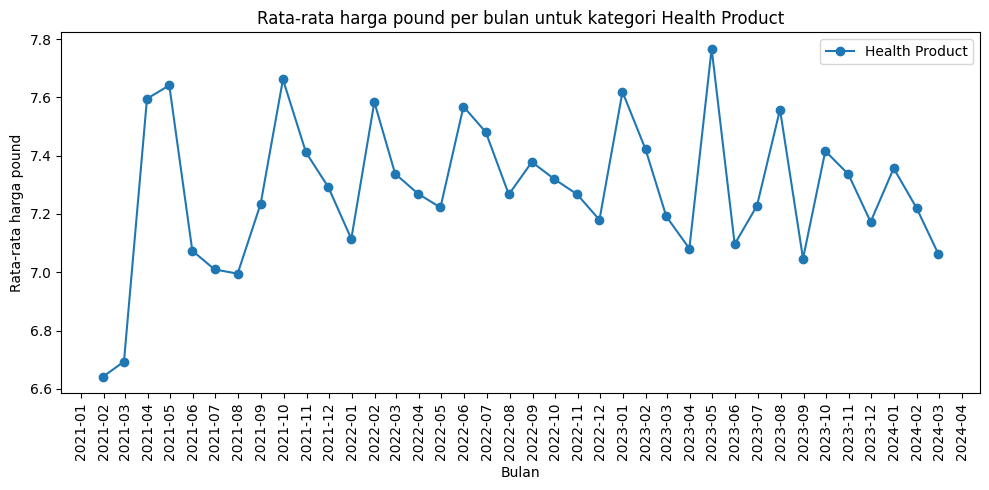

In [ ]:
import matplotlib.dates as mdates
# Create the time series plot for health_products
plt.figure(figsize=(10, 5))
plt.plot(monthly_healthproduct['harga_pound'],'o-', label='Health Product')

# Add title and labels
plt.title('Rata-rata harga pound per bulan untuk kategori Health Product')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata harga pound')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

####Cek Dekomposisi Data

In [ ]:
monthly_healthproduct.describe()

harga_pound
count    38.000000
mean      7.284594
std       0.248838
min       6.642037
25%       7.129000
50%       7.268148
75%       7.420426
max       7.766894

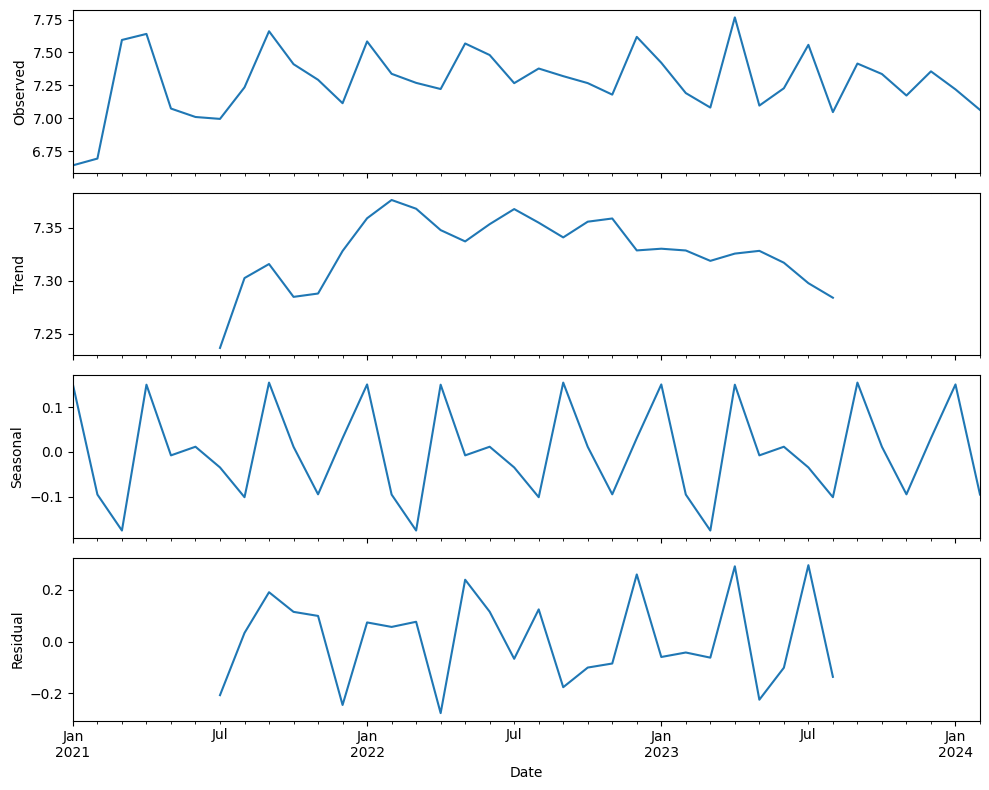

In [ ]:
decomposition = sm.tsa.seasonal_decompose(monthly_healthproduct['harga_pound'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

Berdasarkan hasil dekomposisi datanya, terlihat bahwa data mempunyai unsur musiman sehingga salah satu metode yang dapat digunakan pada data musiman adalah SARIMA.

####Split Data

Akan dilakukan pembagian data menjadi data training dan data testing dengan tujuan agar dapat mengetahui seberapa baik model dalam melakukan prediksi/peramalan.

Proporsi pembagian datanya yaitu 90% data training dan 10% data testing.

Data training digunakan untuk mendapatkan model yang sesuai dengan karakteristik data, sedangkan data testing digunakan untuk peramalan dan evaluasi model peramalan.

In [ ]:
#split data train test
split_index = int(len(monthly_healthproduct) * 0.9)

# Bagi data menjadi train dan test berdasarkan indeks pembagi
train = monthly_healthproduct[:split_index]
test = monthly_healthproduct[split_index:]

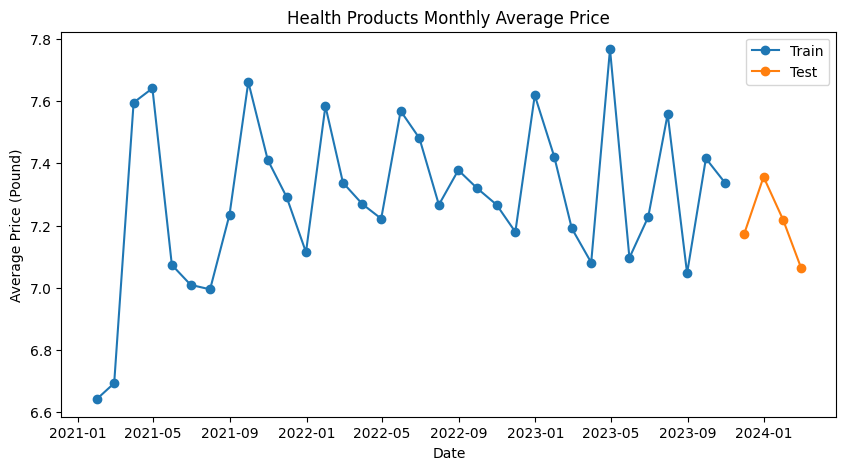

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, 'o-', label='Train')
plt.plot(test.index, test, 'o-', label='Test')
plt.xlabel('Date')
plt.ylabel('Average Price (Pound)')
plt.title('Health Products Monthly Average Price')
plt.legend()
plt.show()

In [ ]:
train()

NameError: name 'train' is not defined

####Cek Stasioneritas

Sebelum melakukan peramalan, maka dilakukan pengecekan stasioneritas data.

In [ ]:
# melakukan uji ADF untuk mengecek stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}:{value}')

print('\nKesimpulan:')
if adf_test[1] <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -5.266681083173136
p-value: 6.4163675461771755e-06
Critical Values:
1%:-3.661428725118324
5%:-2.960525341210433
10%:-2.6193188033298647

Kesimpulan:
(Tolak H0) ---> Stasioner


Berdasarkan hasil pengecekan stasioneritas data menggunakan uji ADF di atas, diperoleh hasil bahwa data telah stasioner dan tidak perlu dilakukan differencing data.

####Plot ACF dan PACF

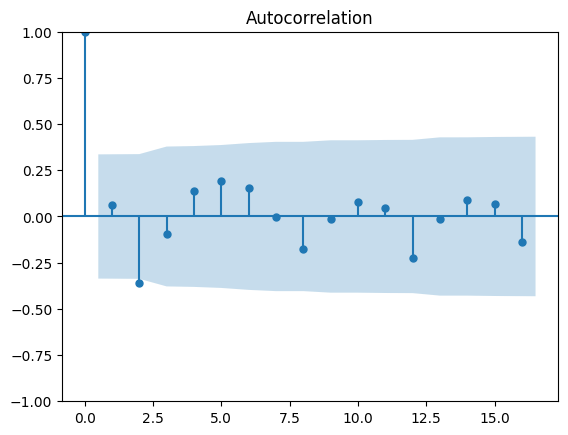

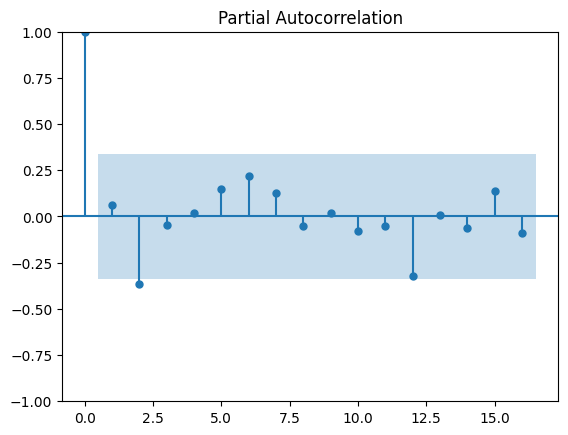

In [ ]:
#plot acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(train)
pacf = plot_pacf(train)

Berdasarkan plot ACF dan PACFnya, terlihat bahwa baik pada plot ACF dan PACF terputus pada lag ke-1 sehingga model dugaannya adalah SARIMA(1,0,1)(0,0,0)[12]

####Modelling SARIMA

In [ ]:
# Define the model
model = sm.tsa.SARIMAX(train,
                order=(1, 0, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 12))  # (P, D, Q, s)

# Fit the model
sarimax_model = model.fit(disp=False)

# Print the summary
print(sarimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:            harga_pound   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  -7.315
Date:                Wed, 05 Jun 2024   AIC                             20.629
Time:                        08:20:46   BIC                             25.208
Sample:                    01-31-2021   HQIC                            22.191
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   6.52e-05   1.53e+04      0.000       1.000       1.000
ma.L1         -0.9112      0.179     -5.078      0.000      -1.263      -0.559
sigma2         0.0703      0.017      4.248      0.0

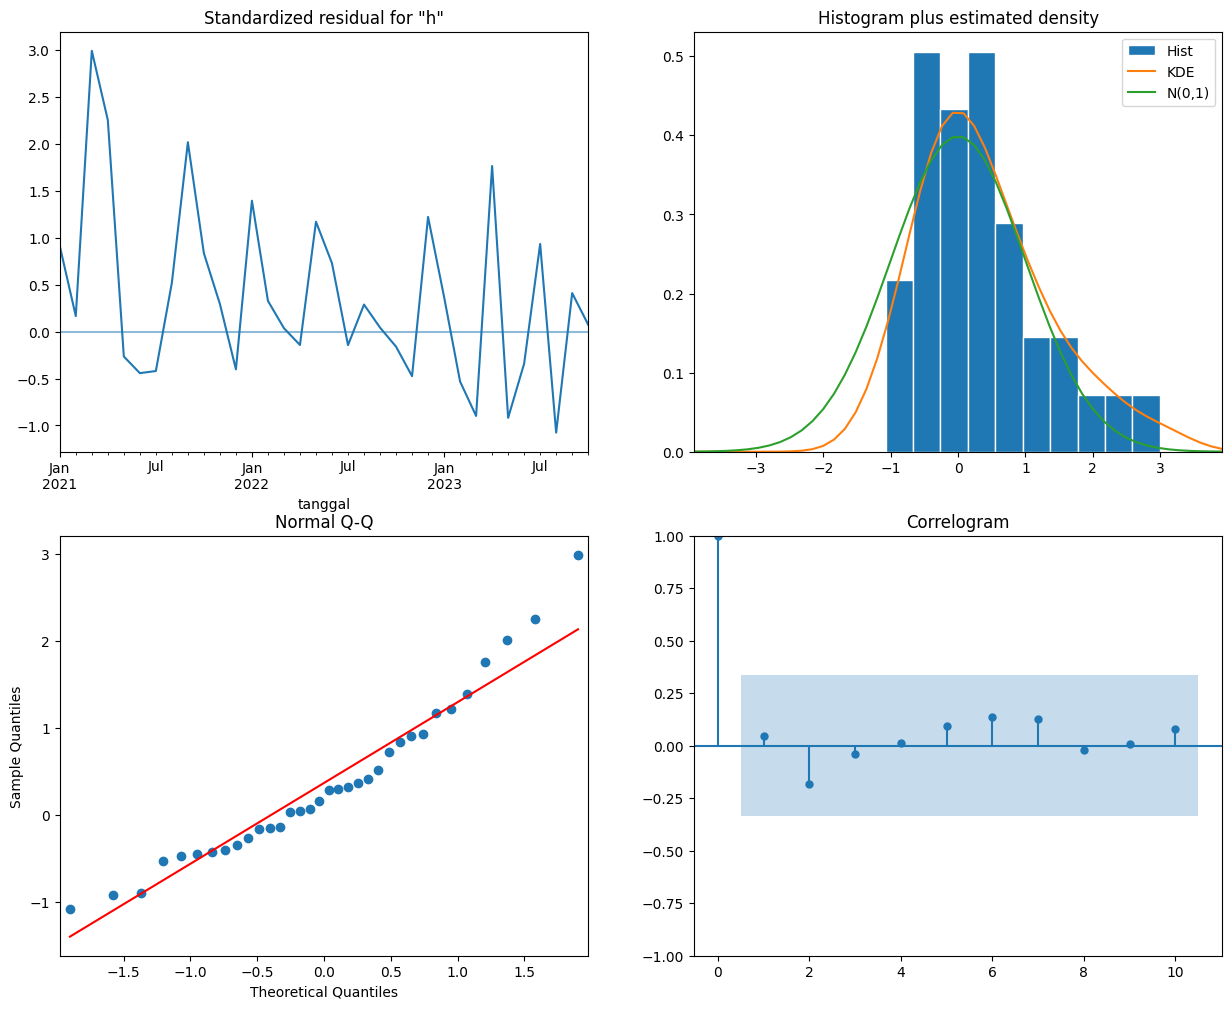

In [ ]:
# Model diagnostics
sarimax_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = sarimax_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.13427558486470637
Test MAPE: 0.01880192721648869
Test RMSE: 0.1559122398321439


Berdasarkan perhitungan nilai akurasinya, diperoleh hasil bahwa akurasi model sangat baik karena nilainya kecil.

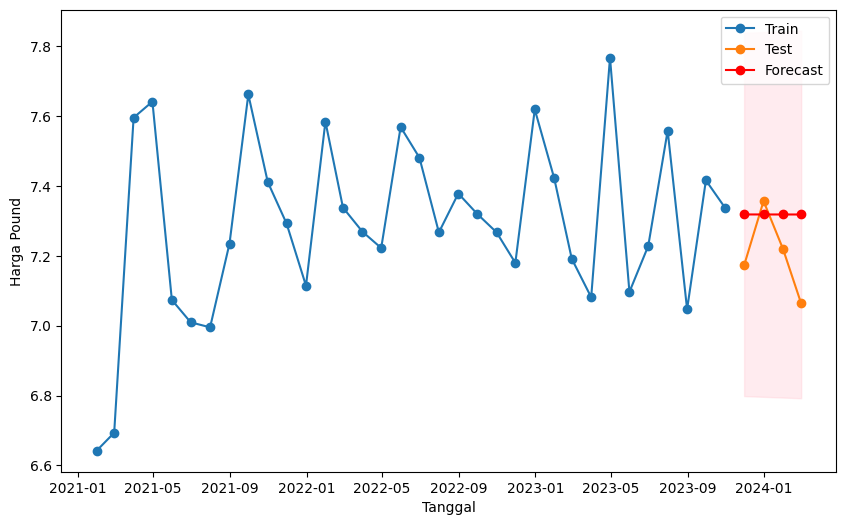

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

Namun, setelah dilakukan plot data hasil peramalan, hasil peramalan belum mengikuti pola data aktualnya sehingga perrlu dilakukan hyperparameter tuning untuk memperbaiki model.

####Hyperparameter Tuning

In [ ]:
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Hyperparameter tuning
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

Best SARIMAX(2, 1, 2)x(1, 0, 2, 12) - AIC:-21.53086806998256


Setelah dilakukan hyperparameter tuning diperoleh model terbaiknya adalah SARIMAX(2,1,2)(1,0,2,12)

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
forecast_series.head()

tanggal
2023-11-30    7.112843
2023-12-31    7.492467
2024-01-31    7.246634
2024-02-29    7.234961
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.09863867556397299
Test MAPE: 0.013719894204588932
Test RMSE: 0.11427516653317016


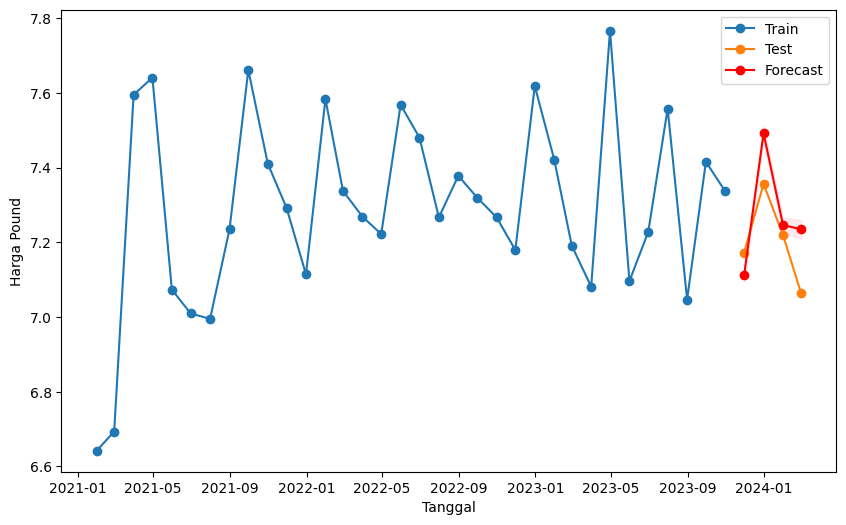

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

Setelah dilakukan hyperparameter tuning, terlihat bahwa hasil peramalan sudah dapat menangkap pola data aktualnya sehingga model menjadi lebih baik dan dapat digunakan untuk peramalan.

####Extract Data

In [ ]:
forecast_data = pd.Series({
    '2023-11-30': 7.112843,
    '2023-12-31': 7.492467,
    '2024-01-31': 7.246634,
    '2024-02-29': 7.234961
}, name='forecast')


In [ ]:
forecast_df = forecast_data.reset_index()
forecast_df.columns = ['tanggal', 'forecast']

In [ ]:
forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

In [ ]:
monthly_healthproduct1 = monthly_healthproduct.reset_index()
monthly_healthproduct1['tanggal'] = pd.to_datetime(monthly_healthproduct1['tanggal'])

In [ ]:
forecast_cvfamz = pd.merge(monthly_healthproduct1, forecast_df, on='tanggal', how='left')
forecast_cvfamz.head()

tanggal  harga_pound  forecast
0 2021-01-31     6.642037       NaN
1 2021-02-28     6.693487       NaN
2 2021-03-31     7.595355       NaN
3 2021-04-30     7.641308       NaN
4 2021-05-31     7.073716       NaN

In [ ]:
forecast_cvfamz['nama_toko'] = 'CVFamz'

In [ ]:
forecast_cvfamz.head()

tanggal  harga_pound  forecast nama_toko
0 2021-01-31     6.642037       NaN    CVFamz
1 2021-02-28     6.693487       NaN    CVFamz
2 2021-03-31     7.595355       NaN    CVFamz
3 2021-04-30     7.641308       NaN    CVFamz
4 2021-05-31     7.073716       NaN    CVFamz

In [ ]:
forecast_cvfamz.tail()

tanggal  harga_pound  forecast nama_toko
33 2023-10-31     7.336331       NaN    CVFamz
34 2023-11-30     7.172868  7.112843    CVFamz
35 2023-12-31     7.356551  7.492467    CVFamz
36 2024-01-31     7.219561  7.246634    CVFamz
37 2024-02-29     7.063421  7.234961    CVFamz

In [ ]:
forecast_cvfamz.iloc[-4:, forecast_cvfamz.columns.get_loc('harga_pound')] = np.nan

In [ ]:
print(forecast_cvfamz.tail())

      tanggal  harga_pound  forecast nama_toko
33 2023-10-31     7.336331       NaN    CVFamz
34 2023-11-30          NaN  7.112843    CVFamz
35 2023-12-31          NaN  7.492467    CVFamz
36 2024-01-31          NaN  7.246634    CVFamz
37 2024-02-29          NaN  7.234961    CVFamz


In [ ]:
#simpan data ke csv
forecast_cvfamz.to_csv('CVFamz_forecast.csv', index = False)

#British Mart

###Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller

In [ ]:
BrMart = pd.read_csv("/content/drive/MyDrive/Dataset/BritishMart.csv")
BrMart

nama_toko  harga_pound  harga_per_unit  unit  \
0       BritishMart         1.35            1.35     l   
1       BritishMart         2.10            2.10     l   
2       BritishMart         1.00            0.70     l   
3       BritishMart         2.10            2.10     l   
4       BritishMart         1.00            0.70     l   
...             ...          ...             ...   ...   
979861  BritishMart         9.50            9.50  unit   
979862  BritishMart         3.00            3.00  unit   
979863  BritishMart         2.00            2.00  unit   
979864  BritishMart        25.00           25.00  unit   
979865  BritishMart        15.00           15.00  unit   

                                              nama kategori  brand_sendiri  \
0                        Alpro Oat Long Life Drink   drinks          False   
1                       Alpro Almond Chilled Drink   drinks          False   
2                 Volvic Touch of Fruit Strawberr…   drinks          False   
3                         Alpro Soya Chilled Drink   drinks          False   
4               Volvic Touch of Fruit Lemon & Lim…   drinks          False   
...                                            ...      ...            ...   
979861    Morrisons Wooden Rectangular Paddleboard     home           True   
979862                     Morrisons Wooden Turner     home           True   
979863  Talking Tables Metallic Gold Slogan Napkin     home          False   
979864                 Tcp Smart Led Double Switch     home          False   
979865                   TCP Smart LED Gu10 380Lm…     home          False   

           tanggal  
0       2021-01-01  
1       2021-01-01  
2       2021-01-01  
3       2021-01-01  
4       2021-01-01  
...            ...  
979861  2022-02-26  
979862  2022-02-27  
979863  2022-02-28  
979864  2022-03-01  
979865  2022-03-02  

[979866 rows x 8 columns]

In [ ]:
BrMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979866 entries, 0 to 979865
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   nama_toko       979866 non-null  object 
 1   harga_pound     979866 non-null  float64
 2   harga_per_unit  979866 non-null  float64
 3   unit            979866 non-null  object 
 4   nama            979866 non-null  object 
 5   kategori        979866 non-null  object 
 6   brand_sendiri   979866 non-null  bool   
 7   tanggal         979866 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 53.3+ MB


In [ ]:
# Melihat jumlah baris dan kolom
print(BrMart.shape)

# Melihat nama-nama kolom
print(BrMart.columns)

# Melihat beberapa baris pertama dari dataframe
print(BrMart.head())

(979866, 8)
Index(['nama_toko', 'harga_pound', 'harga_per_unit', 'unit', 'nama',
       'kategori', 'brand_sendiri', 'tanggal'],
      dtype='object')
     nama_toko  harga_pound  harga_per_unit unit  \
0  BritishMart         1.35            1.35    l   
1  BritishMart         2.10            2.10    l   
2  BritishMart         1.00            0.70    l   
3  BritishMart         2.10            2.10    l   
4  BritishMart         1.00            0.70    l   

                                 nama kategori  brand_sendiri     tanggal  
0           Alpro Oat Long Life Drink   drinks          False  2021-01-01  
1          Alpro Almond Chilled Drink   drinks          False  2021-01-01  
2    Volvic Touch of Fruit Strawberr…   drinks          False  2021-01-01  
3            Alpro Soya Chilled Drink   drinks          False  2021-01-01  
4  Volvic Touch of Fruit Lemon & Lim…   drinks          False  2021-01-01  


In [ ]:
# Melihat ringkasan statistik dari dataframe
print(BrMart.describe())

         harga_pound  harga_per_unit
count  979866.000000   979866.000000
mean        5.045403       25.310135
std         6.843133      159.595147
min         0.250000        0.000000
25%         1.750000        3.290000
50%         2.990000        7.300000
75%         5.500000       14.700000
max       300.000000    11225.000000


##Missing Value

In [ ]:
# Melihat jumlah data yang hilang pada setiap kolom
print(BrMart.isnull().sum())

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64


##Sesuaikan Tipe Data

In [ ]:
#ubah tipe kolom tanggal ke datetime
BrMart['tanggal'] = pd.to_datetime(BrMart['tanggal'])

In [ ]:
BrMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979866 entries, 0 to 979865
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   nama_toko       979866 non-null  object        
 1   harga_pound     979866 non-null  float64       
 2   harga_per_unit  979866 non-null  float64       
 3   unit            979866 non-null  object        
 4   nama            979866 non-null  object        
 5   kategori        979866 non-null  object        
 6   brand_sendiri   979866 non-null  bool          
 7   tanggal         979866 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 53.3+ MB


##Duplikat

In [ ]:
BrMart.duplicated().sum()

18

In [ ]:
dup = BrMart[BrMart.duplicated()]
pd.set_option('display.max_rows', None)
dup.sort_values(by='tanggal')

nama_toko  harga_pound  harga_per_unit  unit  \
979480  BritishMart        14.00           14.00  unit   
979505  BritishMart         9.00            9.00  unit   
979508  BritishMart        15.00           15.00  unit   
979534  BritishMart        10.00           10.00  unit   
979557  BritishMart         4.60            4.60  unit   
979558  BritishMart        12.00           12.00  unit   
979559  BritishMart         5.00            5.00  unit   
979584  BritishMart         5.00            5.00  unit   
979635  BritishMart         7.00            7.00  unit   
979685  BritishMart         4.60            4.60  unit   
979686  BritishMart         4.60            4.60  unit   
979710  BritishMart        12.00           12.00  unit   
979735  BritishMart         5.25            5.25  unit   
979736  BritishMart         3.50            3.50  unit   
979787  BritishMart        32.00           32.00  unit   
979812  BritishMart         3.20            3.20  unit   
979836  BritishMart         3.00            3.00  unit   
979864  BritishMart        25.00           25.00  unit   

                                              nama         kategori  \
979480    Nutmeg Home Easy Care Kingy Duvet Double             home   
979505             Clairol Blonde It Up Permanent…  health_products   
979508              Nutmeg Home Frosted Fern In T…             home   
979534       Nutmeg Home Head Down Stripe Duckling             home   
979557   Nice N Easy No Ammonia Light Ash Brown 75  health_products   
979558     Nutmeg Home Orchid Faux Floral Ornament             home   
979559                  Nutmeg Home Owl Oil Burner             home   
979584              Nutmeg Home Sleep Luxury Scen…             home   
979635        Nutmeg Outdoor Oscillating Sprinkler             home   
979685  Nice N Easy No Ammonia Light Gold Brown 76  health_products   
979686  Nice N Easy No Ammonia Light Warm Brown 92  health_products   
979710            Status 9W Smart Wifi Led Gls Li…             home   
979735           Triplewax Microfibre Cloth 3 Pack             home   
979736                      Bigen Dark Chestnut 48  health_products   
979787            Gillette Fusion ProGlide Big Pa…  health_products   
979812          Morrisons Three Blade System Razor  health_products   
979836         Simplicity Decorative Slides 4 Pack  health_products   
979864                 Tcp Smart Led Double Switch             home   

        brand_sendiri    tanggal  
979480           True 2021-02-10  
979505          False 2021-03-07  
979508           True 2021-03-10  
979534           True 2021-04-05  
979557          False 2021-04-28  
979558           True 2021-04-29  
979559           True 2021-04-30  
979584           True 2021-05-25  
979635           True 2021-07-15  
979685          False 2021-09-03  
979686          False 2021-09-04  
979710          False 2021-09-28  
979735          False 2021-10-23  
979736          False 2021-10-24  
979787          False 2021-12-14  
979812           True 2022-01-08  
979836          False 2022-02-01  
979864          False 2022-03-01

In [ ]:
#persentase duplikat value
persentase = ((BrMart.duplicated().sum())/len(BrMart))*100
persentase

0.001836985873578632

In [ ]:
#hapus data duplikat
BrMart = BrMart.drop_duplicates()

In [ ]:
BrMart.duplicated().sum()

0

In [ ]:
# Melihat tipe data dari setiap kolom
print(BrMart.dtypes)

nama_toko                 object
harga_pound              float64
harga_per_unit           float64
unit                      object
nama                      object
kategori                  object
brand_sendiri               bool
tanggal           datetime64[ns]
dtype: object


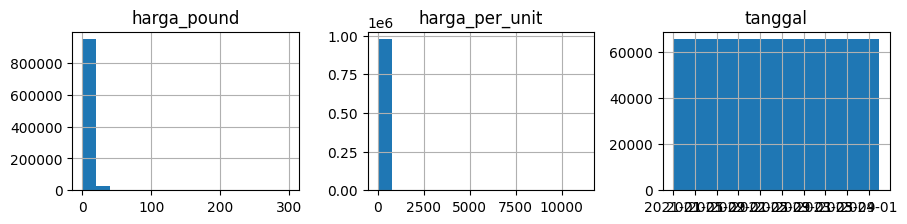

In [ ]:
# Membuat histogram untuk semua kolom numerik
BrMart.hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.tight_layout()
plt.show()

In [ ]:
#simpan data ke csv
BrMart.to_csv('BrMart_clean.csv', index = False)

##Analisis Data Health Products


##Plot Data

In [ ]:
health_products = BrMart[BrMart['kategori'] == 'health_products']

In [ ]:
healthproducts = health_products[['tanggal','harga_pound']]
healthproducts=pd.DataFrame(healthproducts)
healthproducts['tanggal']=pd.to_datetime(healthproducts['tanggal'])
healthproducts.head()

tanggal  harga_pound
5248 2021-01-07         6.55
5249 2021-01-07         3.80
5250 2021-01-07         5.50
5251 2021-01-07        31.00
5252 2021-01-07         5.00

In [ ]:
print(health_products.describe())

         harga_pound  harga_per_unit                        tanggal
count  156034.000000   156034.000000                         156034
mean        6.632762       67.829632  2022-07-31 11:30:23.094966528
min         0.250000        0.000000            2021-01-02 00:00:00
25%         2.500000        3.000000            2021-10-13 00:00:00
50%         4.500000       11.500000            2022-08-05 00:00:00
75%         8.000000       35.000000            2023-05-11 00:00:00
max       300.000000     8500.000000            2024-02-29 00:00:00
std         8.797924      253.890299                            NaN


In [ ]:
top_selling_products =health_products['nama'].value_counts().head(10)
print("\nTop 10 Selling Products by Frequency:")
print(top_selling_products)


Top 10 Selling Products by Frequency:
nama
Jungle Formula Outdoor & Campin…         49
Vaseline Lip Therapy With Aloe Vera      49
TENA Men Level 2 Incontinen…             49
Senokot Tablets Senna                    49
Vaseline Lip Therapy Original Tin        49
Jungle Formula Insect Rep…               49
Bodyform Dailies So Slim Panty Liners    49
Vitabiotics Jointcare Chondroitin        49
Cuticura Cucumber Hand Gel               49
Keia Soothing Pillow Mist                49
Name: count, dtype: int64


In [ ]:
brand_vs_non_brand = health_products['brand_sendiri'].value_counts()
print("\nBrand vs Non-Brand Distribution:")
print(brand_vs_non_brand)


Brand vs Non-Brand Distribution:
brand_sendiri
False    143511
True      12523
Name: count, dtype: int64


In [ ]:
df1 = healthproducts.set_index('tanggal')

In [ ]:
monthly_healthproduct = df1.resample('M').mean()
monthly_healthproduct.head()

harga_pound
tanggal                
2021-01-31     6.613823
2021-02-28     6.491721
2021-03-31     6.815369
2021-04-30     7.169616
2021-05-31     6.730377

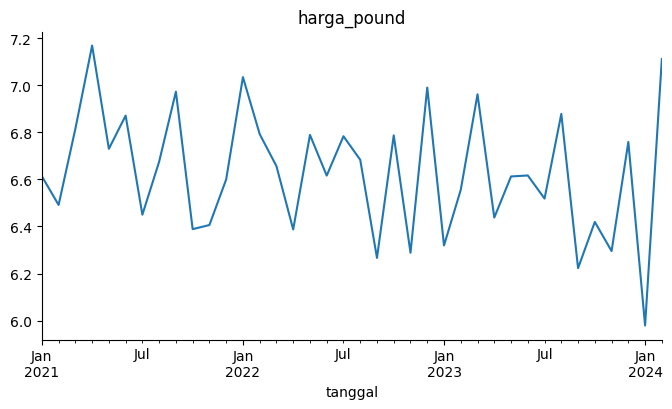

In [ ]:
# @title harga_pound

from matplotlib import pyplot as plt
monthly_healthproduct['harga_pound'].plot(kind='line', figsize=(8, 4), title='harga_pound')
plt.gca().spines[['top', 'right']].set_visible(False)

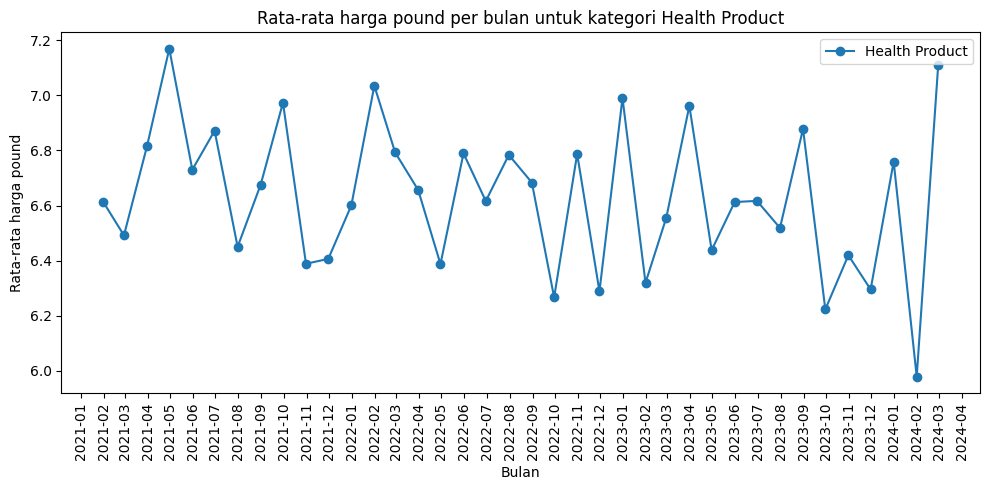

In [ ]:
# Create the time series plot for health_products
plt.figure(figsize=(10, 5))
plt.plot(monthly_healthproduct['harga_pound'],'o-', label='Health Product')

# Add title and labels
plt.title('Rata-rata harga pound per bulan untuk kategori Health Product')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata harga pound')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

###Cek Dekomposisi Harga

In [ ]:
monthly_healthproduct.describe()

harga_pound
count    38.000000
mean      6.630460
std       0.270158
min       5.978899
25%       6.424119
50%       6.616745
75%       6.792106
max       7.169616

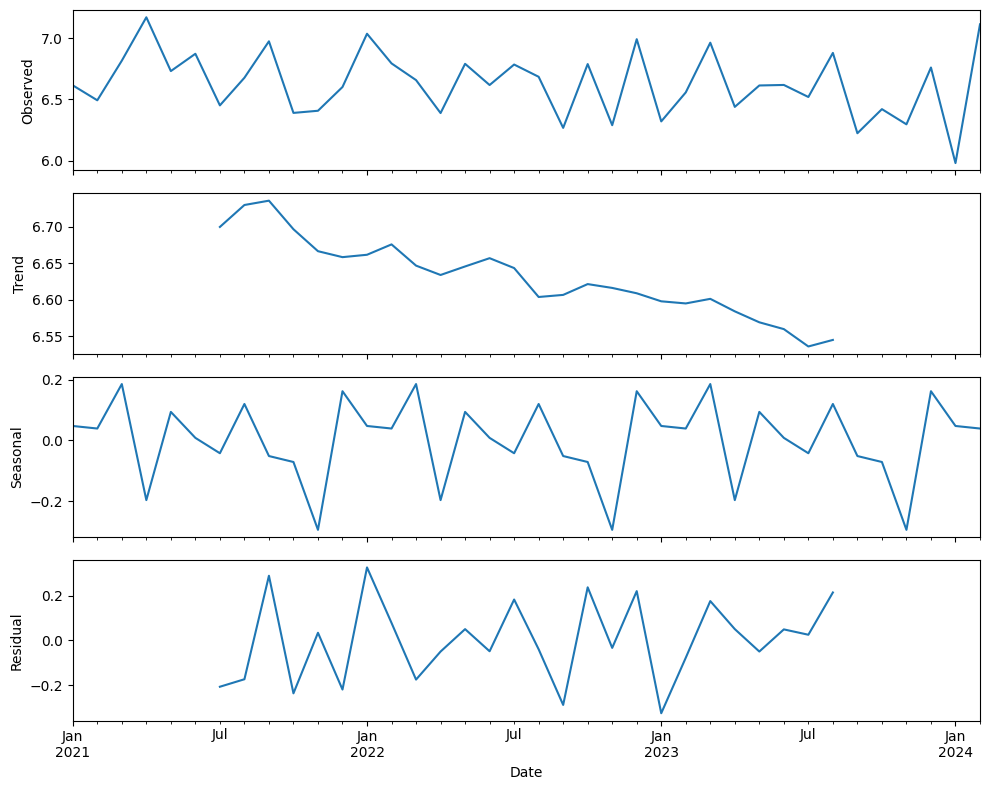

In [ ]:
import statsmodels.api as sm
# Dekomposisi data time series
decomposition = sm.tsa.seasonal_decompose(monthly_healthproduct['harga_pound'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

###Split Data

In [ ]:
#split data train test
split_index = int(len(monthly_healthproduct) * 0.9)

# Bagi data menjadi train dan test berdasarkan indeks pembagi
train = monthly_healthproduct[:split_index]
test = monthly_healthproduct[split_index:]

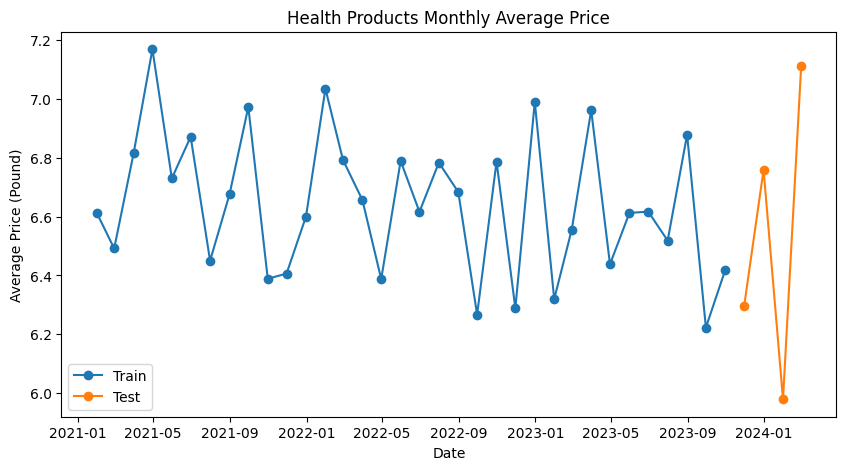

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, 'o-', label='Train')
plt.plot(test.index, test, 'o-', label='Test')
plt.xlabel('Date')
plt.ylabel('Average Price (Pound)')
plt.title('Health Products Monthly Average Price')
plt.legend()
plt.show()

###Cek Stasioneritas

In [ ]:
# melakukan uji ADF untuk mengecek stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}:{value}')

print('\nKesimpulan:')
if adf_test[1] <= 0.05:
    print("(Tolak H0) ---> Stasioner")
else:
    print("(Gagal Tolak H0) Tidak stasioner")

ADF Statistic: -1.6973408681458617
p-value: 0.4324830597845025
Critical Values:
1%:-3.6790595944893187
5%:-2.9678817237279103
10%:-2.6231583472057074

Kesimpulan:
(Gagal Tolak H0) Tidak stasioner


###Plot ACF PACF

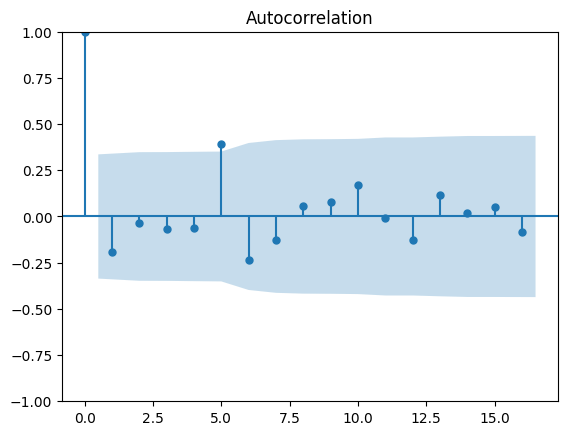

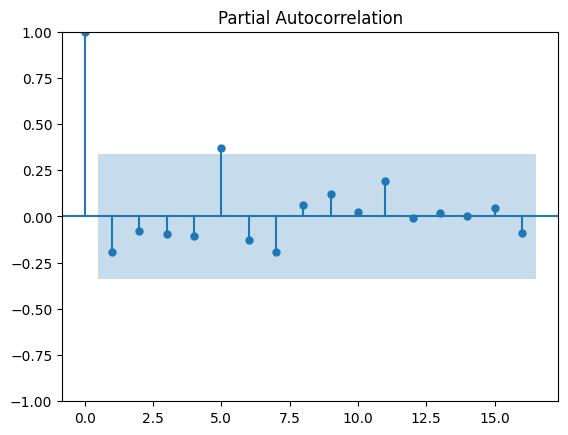

In [ ]:
#plot acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(train)
pacf = plot_pacf(train)

###Modeling SARIMA

In [ ]:
# Define the model
model = sm.tsa.SARIMAX(train,
                order=(1, 0, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 12))  # (P, D, Q, s)

# Fit the model
sarimax_model = model.fit(disp=False)

# Print the summary
print(sarimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:            harga_pound   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  -4.808
Date:                Wed, 05 Jun 2024   AIC                             15.616
Time:                        08:37:45   BIC                             20.195
Sample:                    01-31-2021   HQIC                            17.178
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   9.11e-05    1.1e+04      0.000       1.000       1.000
ma.L1         -0.9377      0.165     -5.671      0.000      -1.262      -0.614
sigma2         0.0602      0.021      2.927      0.0

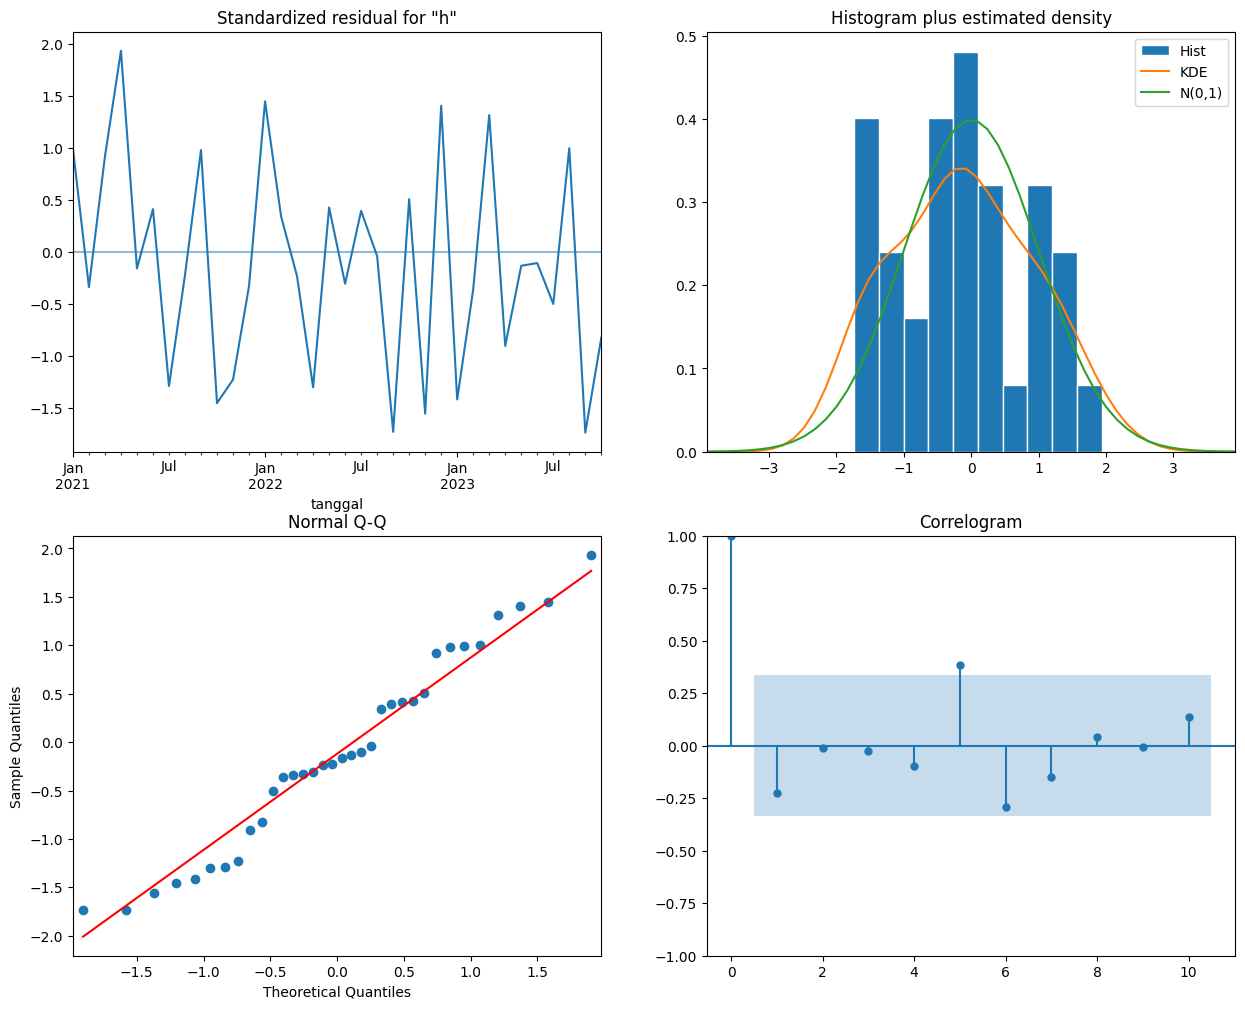

In [ ]:
# Model diagnostics
sarimax_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = sarimax_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.39937056250680114
Test MAPE: 0.06205675028728365
Test RMSE: 0.439126133875963


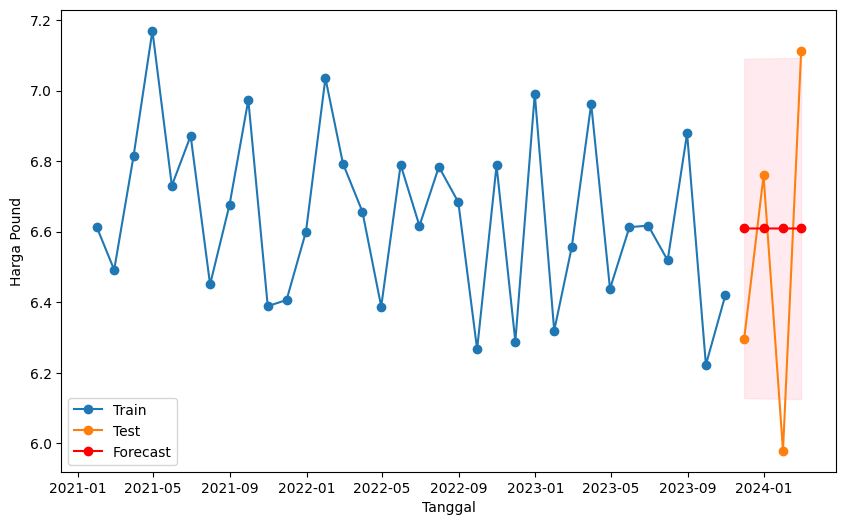

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

###Hyperparameter Tuning

In [ ]:
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Hyperparameter tuning
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

Best SARIMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:-5.124257601229132


In [ ]:
# Forecast the test set
forecast_steps = len(test)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [ ]:
forecast_series.head()

tanggal
2023-11-30    6.472862
2023-12-31    6.797225
2024-01-31    6.307556
2024-02-29    6.599387
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
# Calculate the forecast error
mae = mean_absolute_error(test, forecast_series)
mape = mean_absolute_percentage_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))

print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}')
print(f'Test RMSE: {rmse}')

Test MAE: 0.2641828880135797
Test MAPE: 0.04021286828082825
Test RMSE: 0.3178057489023719


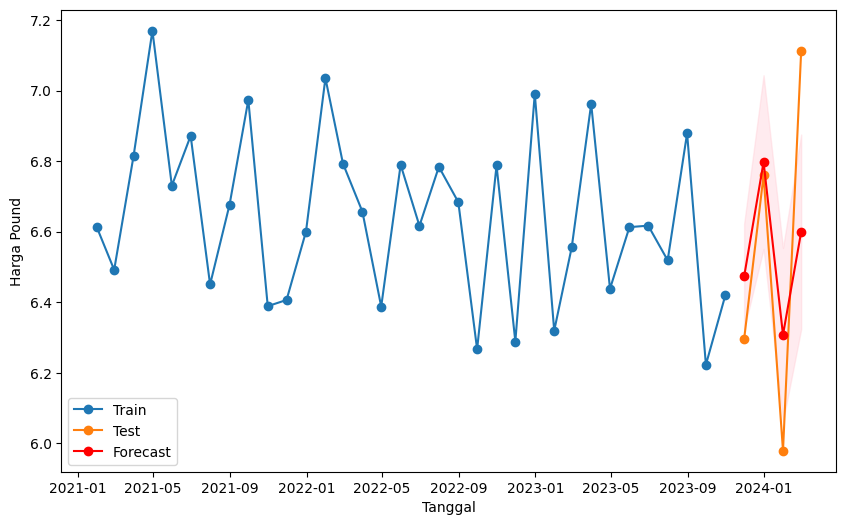

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, '-o', label='Train')
plt.plot(test, '-o', label='Test')
plt.plot(forecast_series, '-o', label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Tanggal')
plt.ylabel('Harga Pound')
plt.legend()
plt.show()

###Extract Data

In [ ]:
forecast_data = pd.Series({
    '2023-11-30': 6.47286,
    '2023-12-31': 6.797225,
    '2024-01-31': 6.307556,
    '2024-02-29': 6.599387
}, name='forecast')


In [ ]:
forecast_df = forecast_data.reset_index()
forecast_df.columns = ['tanggal', 'forecast']

In [ ]:
forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

In [ ]:
monthly_healthproduct1 = monthly_healthproduct.reset_index()
monthly_healthproduct1['tanggal'] = pd.to_datetime(monthly_healthproduct1['tanggal'])

In [ ]:
forecast_BrMart = pd.merge(monthly_healthproduct1, forecast_df, on='tanggal', how='left')
forecast_BrMart.head()

tanggal  harga_pound  forecast
0 2021-01-31     6.613823       NaN
1 2021-02-28     6.491721       NaN
2 2021-03-31     6.815369       NaN
3 2021-04-30     7.169616       NaN
4 2021-05-31     6.730377       NaN

In [ ]:
forecast_BrMart['nama_toko'] = 'BrMart'

In [ ]:
forecast_BrMart.head()

tanggal  harga_pound  forecast nama_toko
0 2021-01-31     6.613823       NaN    BrMart
1 2021-02-28     6.491721       NaN    BrMart
2 2021-03-31     6.815369       NaN    BrMart
3 2021-04-30     7.169616       NaN    BrMart
4 2021-05-31     6.730377       NaN    BrMart

In [ ]:
forecast_BrMart.tail()

tanggal  harga_pound  forecast nama_toko
33 2023-10-31     6.419496       NaN    BrMart
34 2023-11-30     6.295446  6.472860    BrMart
35 2023-12-31     6.759486  6.797225    BrMart
36 2024-01-31     5.978899  6.307556    BrMart
37 2024-02-29     7.112305  6.599387    BrMart

In [ ]:
forecast_BrMart.iloc[-4:, forecast_BrMart.columns.get_loc('harga_pound')] = np.nan

In [ ]:
print(forecast_BrMart.tail())

      tanggal  harga_pound  forecast nama_toko
33 2023-10-31     6.419496       NaN    BrMart
34 2023-11-30          NaN  6.472860    BrMart
35 2023-12-31          NaN  6.797225    BrMart
36 2024-01-31          NaN  6.307556    BrMart
37 2024-02-29          NaN  6.599387    BrMart


In [ ]:
#simpan data ke csv
forecast_BrMart.to_csv('BrMart_forecast.csv', index = False)

##Gabung Data Untuk Visualisasi Dashboard

###Data Clean

In [ ]:
clean_british = pd.read_csv("BrMart_clean.csv")
clean_cvfamz = pd.read_csv("CVFamz_clean.csv")
clean_anymart = pd.read_csv("/content/drive/MyDrive/Data Clean/CVAny_Cleant.csv")
clean_scottich = pd.read_csv("Scottish_clean.csv")
clean_ukmart = pd.read_csv("UKMart_clean.csv")

In [ ]:
clean_gabung = pd.concat([clean_british, clean_cvfamz, clean_anymart, clean_scottich, clean_ukmart])

In [ ]:
clean_gabung.to_csv('gabungan clean.csv', index = False)

###Data Forecast

In [ ]:
fc_scottish = pd.read_csv("Scottish_forecast.csv")
fc_cvfamz = pd.read_csv("CVFamz_forecast.csv")
fc_british = pd.read_csv("BrMart_forecast.csv")
fc_ukmart = pd.read_csv("uk_forecast.csv")
fc_anymart = pd.read_csv("/content/drive/MyDrive/Data Forecast/CVAny_forecast.csv")

In [ ]:
fc_gabung = pd.concat([fc_scottish, fc_cvfamz, fc_british, fc_ukmart, fc_anymart])

In [ ]:
fc_gabung

tanggal  harga_pound  forecast     nama_toko
0   2021-01-31     6.633836       NaN  ScottishMart
1   2021-02-28     7.006630       NaN  ScottishMart
2   2021-03-31     7.511294       NaN  ScottishMart
3   2021-04-30     7.442022       NaN  ScottishMart
4   2021-05-31     6.738129       NaN  ScottishMart
5   2021-06-30     7.036896       NaN  ScottishMart
6   2021-07-31     7.531562       NaN  ScottishMart
7   2021-08-31     6.961469       NaN  ScottishMart
8   2021-09-30     6.969367       NaN  ScottishMart
9   2021-10-31     7.120538       NaN  ScottishMart
10  2021-11-30     6.881099       NaN  ScottishMart
11  2021-12-31     6.950767       NaN  ScottishMart
12  2022-01-31     6.790111       NaN  ScottishMart
13  2022-02-28     6.964225       NaN  ScottishMart
14  2022-03-31     7.068556       NaN  ScottishMart
15  2022-04-30     6.928756       NaN  ScottishMart
16  2022-05-31     6.909183       NaN  ScottishMart
17  2022-06-30     6.897536       NaN  ScottishMart
18  2022-07-31     7.171652       NaN  ScottishMart
19  2022-08-31     6.988606       NaN  ScottishMart
20  2022-09-30     6.913230       NaN  ScottishMart
21  2022-10-31     7.040072       NaN  ScottishMart
22  2022-11-30     7.041131       NaN  ScottishMart
23  2022-12-31     6.874657       NaN  ScottishMart
24  2023-01-31     6.962349       NaN  ScottishMart
25  2023-02-28     6.958686       NaN  ScottishMart
26  2023-03-31     6.970377       NaN  ScottishMart
27  2023-04-30     6.969173       NaN  ScottishMart
28  2023-05-31     6.849909       NaN  ScottishMart
29  2023-06-30     7.141012       NaN  ScottishMart
30  2023-07-31     6.910569       NaN  ScottishMart
31  2023-08-31     6.998850       NaN  ScottishMart
32  2023-09-30     7.049290       NaN  ScottishMart
33  2023-10-31     7.179457       NaN  ScottishMart
34  2023-11-30          NaN  6.984997  ScottishMart
35  2023-12-31          NaN  7.086013  ScottishMart
36  2024-01-31          NaN  7.105199  ScottishMart
37  2024-02-29          NaN  7.104398  ScottishMart
0   2021-01-31     6.642037       NaN        CVFamz
1   2021-02-28     6.693487       NaN        CVFamz
2   2021-03-31     7.595355       NaN        CVFamz
3   2021-04-30     7.641308       NaN        CVFamz
4   2021-05-31     7.073716       NaN        CVFamz
5   2021-06-30     7.009628       NaN        CVFamz
6   2021-07-31     6.995172       NaN        CVFamz
7   2021-08-31     7.235040       NaN        CVFamz
8   2021-09-30     7.661634       NaN        CVFamz
9   2021-10-31     7.411132       NaN        CVFamz
10  2021-11-30     7.292415       NaN        CVFamz
11  2021-12-31     7.114377       NaN        CVFamz
12  2022-01-31     7.584124       NaN        CVFamz
13  2022-02-28     7.337910       NaN        CVFamz
14  2022-03-31     7.269084       NaN        CVFamz
15  2022-04-30     7.222249       NaN        CVFamz
16  2022-05-31     7.568551       NaN        CVFamz
17  2022-06-30     7.480711       NaN        CVFamz
18  2022-07-31     7.266889       NaN        CVFamz
19  2022-08-31     7.378241       NaN        CVFamz
20  2022-09-30     7.320137       NaN        CVFamz
21  2022-10-31     7.267211       NaN        CVFamz
22  2022-11-30     7.179670       NaN        CVFamz
23  2022-12-31     7.618873       NaN        CVFamz
24  2023-01-31     7.421930       NaN        CVFamz
25  2023-02-28     7.191391       NaN        CVFamz
26  2023-03-31     7.081287       NaN        CVFamz
27  2023-04-30     7.766894       NaN        CVFamz
28  2023-05-31     7.096447       NaN        CVFamz
29  2023-06-30     7.227996       NaN        CVFamz
30  2023-07-31     7.558242       NaN        CVFamz
31  2023-08-31     7.046786       NaN        CVFamz
32  2023-09-30     7.415915       NaN        CVFamz
33  2023-10-31     7.336331       NaN        CVFamz
34  2023-11-30          NaN  7.112843        CVFamz
35  2023-12-31          NaN  7.492467        CVFamz
36  2024-01-31          NaN  7.246634        CVFamz
37  2024-02-29          NaN  7.234961        CVFamz
0  

In [ ]:
fc_gabung.to_csv('gabungan forecast.csv', index = False)